<p align="center">
<img src="Images/sorbonne_logo.png" alt="Logo" width="300"/>
</p>

# **PANEL DATA ECONOMETRICS - Code File**

* **Author**: Elia Landini
* **Student ID**: 12310239
* **Course**: EESM2-Financial Economics 
* **Class**: Panel Data Econometrics
* **Supervisor**: Jean-Bernard Chatelain 
* **Reference Paper**: Lofaro, A., & Di Bucchianico, S. (2025). Impact of monetary policy on functional income distribution: A panel vector autoregressive analysis. Economic Modelling, 107227
* **Reference Repository**: https://github.com/EliaLand/PVAR_MonetaryPolicy_FunctionalIncome

### **0) REQUIREMENTS SET-UP**

In [23]:
# Requirements.txt file installation
# !pip install -r requirements.txt

In [24]:
# Libraries import
import warnings
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import levene
from scipy.stats import ks_2samp
from scipy.stats import kstest
from scipy.stats import pearsonr
from scipy.stats import jarque_bera
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import sklearn.tree
import sklearn.metrics
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                             precision_score, recall_score, f1_score,
                             accuracy_score, precision_recall_curve, auc, 
                             RocCurveDisplay, ConfusionMatrixDisplay)
from sklearn.linear_model import (LinearRegression, LogisticRegression)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight
import plotly.express as px
import openpyxl as pxl
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from IPython.display import Image
import itertools
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from ann_visualizer.visualize import ann_viz
from collections import Counter
import shap

In [25]:
# Statistical Significance labelling 
def significance_stars(p):
    if p < 0.001:
        return "***"  
    elif p < 0.01:
        return "**"    
    elif p < 0.05:
        return "*"   
    else:
        return ""

In [26]:
# We supress potential warnings with this command
warnings.filterwarnings("ignore")

### **1) PART 1 - DATASET, UNIVARIATE & BIVARIATE DESCRIPTIVE STATISTICS AFTER TRANSFORMATIONS**

##### <span style="color: dodgerblue"> **1.1) In your data set, which are the variables which are varying with respect to two indices (or more) if you consider inflows and outflows from one individual or country to another individual or countries? Which are the variables which are varying only with respect to time? Which are the variables which are varying only with respect to individuals?** </span>

In [27]:
# Data loading 
# Data source: https://data.mendeley.com/datasets/dbfjwwwzgf/1 

raw_df = pd.read_excel("Data/Dataset_MP_Impact_functional_Distribution.xlsx")

# Transfor year in datetime format 
# (!!!) With this we avoid to include the year column as a numeric column in the descriptive statistics computations
raw_df["year"] = pd.to_datetime(raw_df["year"], format="%Y")

raw_df

year    country          i      P          W         WR  \
0   1970-01-01  Australia   7.108333    9.1   6.413648  76.120158   
1   1971-01-01  Australia   7.008333    9.6   6.909308  77.071751   
2   1972-01-01  Australia   5.083333   10.2   7.284607  75.808223   
3   1973-01-01  Australia   6.983333   11.1   8.096658  74.465333   
4   1974-01-01  Australia  13.158333   12.9   9.688749  75.817692   
..         ...        ...        ...    ...        ...        ...   
745 2015-01-01        USA   0.226667  100.0  65.600000  62.655205   
746 2016-01-01        USA   0.644167  101.3  66.400000  62.819300   
747 2017-01-01        USA   1.152500  103.4  68.600000  63.695450   
748 2018-01-01        USA   2.188333  105.9  70.900000  64.279238   
749 2019-01-01        USA   2.207500  107.9  73.100000  65.093500   

              GDP    LS       PCOM        UN   SHORTUN  LONGUN          LF  \
0    2.835193e+05  59.7   2.113115  1.653364       NaN     NaN    5478.225   
1    2.946057e+05  60.4   2.709369  1.907799       NaN     NaN    5622.972   
2    3.023225e+05  60.3   2.925285  2.610752       NaN     NaN    5750.258   
3    3.147389e+05  60.8   4.174010  2.309362       NaN     NaN    5899.899   
4    3.189447e+05  66.9  13.802962  2.670259       NaN     NaN    6052.784   
..            ...   ...        ...       ...       ...     ...         ...   
745  1.820602e+07  56.8  66.099106  5.279920  5968.333  2328.0  157129.900   
746  1.850960e+07  56.8  56.023884  4.869110  5746.000  2005.0  159187.200   
747  1.892457e+07  56.9  69.357989  4.355201  5294.250  1688.0  160319.800   
748  1.948198e+07  56.8  89.358138  3.895676  4964.917  1349.0  162075.000   
749  1.992897e+07  56.9  78.251714  3.669213  4733.583  1267.0  163538.700   

           REER         SH  
0     93.904724   7.108333  
1     97.030332   7.008333  
2     98.243273   5.083333  
3    109.985873   6.983333  
4    111.086199  13.158333  
..          ...        ...  
745  115.215974  -1.142704  
746  118.668129   0.462412  
747  118.325019   0.956409  
748  117.086340   1.940361  
749  120.324844   2.117962  

[750 rows x 15 columns]

In [28]:
# Df Symbols Legend 
# Following Table 1 ("Variable Definitions") in Lofaro & Bucchianico (2025)

labels_mapper = {
    "year" : "Year",
    "country" : "Country", 
    "i" : "Short-Term Interest Rate", 
    "P" : "GDP Deflator", 
    "W" : "Nominal Compensation Per Employee", 
    "WR" : "Real Compensation Per Employee", 
    "GDP" : "Real Gross Domestic Product",
    "LS" : "Adjusted Labour Share",
    "PCOM" : "Energy Commodities Price Index",
    "UN" : "Unemployment Rate", 
    "SHORTUN" : "Short-Term Unemployment",
    "LONGUN" : "Long-Term Unemployment", 
    "LF" : "Labor Force",
    "REER" : "Real Effective Exchange Rate",
    "SH" : "Shadow Interest Rate"
}

In [29]:
# Descriptive data
# Total dataset statistics
    
raw_df.describe()

year           i           P           W          WR  \
count                  750  750.000000  750.000000  740.000000  740.000000   
mean   1994-07-02 12:00:00    6.186977   64.343733   29.663542   49.244036   
min    1970-01-01 00:00:00   -0.695000    1.700000    3.045484   13.615376   
25%    1982-01-01 00:00:00    2.185590   40.550000   16.499738   38.634013   
50%    1994-07-02 12:00:00    5.315000   69.250000   28.064481   45.779160   
75%    2007-01-01 00:00:00    9.508333   90.475000   42.012400   54.778060   
max    2019-01-01 00:00:00   24.900000  110.800000   75.107968  193.613088   
std                    NaN    4.846420   29.535459   16.237418   19.889039   

                GDP          LS        PCOM          UN      SHORTUN  \
count  7.500000e+02  740.000000  750.000000  741.000000   588.000000   
mean   1.941396e+06   58.345405   47.449644    7.090870  1093.540056   
min    7.833901e+04   43.200000    2.113115    0.554685    36.500000   
25%    3.137606e+05   55.200000   22.325814    4.557832   163.868042   
50%    8.989052e+05   58.300000   35.596160    6.776669   696.987875   
75%    2.221882e+06   61.600000   69.357989    8.736210  1063.156250   
max    1.992897e+07   88.400000  135.215071   26.093716  9770.580000   
std    3.088414e+06    5.415204   36.721151    3.961598  1685.300608   

            LONGUN             LF        REER          SH  
count   588.000000     741.000000  750.000000  750.000000  
mean    822.288778   25015.810665   97.542743    5.709472  
min      10.600000    1509.000000   64.192610   -6.956319  
25%     187.013999    4610.000000   90.770763    2.105984  
50%     396.700000   13526.010000   97.000461    5.267943  
75%    1333.500000   27708.250000  101.753458    9.508333  
max    6416.000000  163538.700000  160.023520   24.900000  
std     881.931090   32929.409955   12.833124    5.545043

In [30]:
# Descriptive data
# Single country statistics 
    
for country, df in raw_df.groupby("country"):
# We are interest only in numeric data 
    df = df.select_dtypes(include="number")
    print(f"\n=== {country} ===")
    print(df.describe())


=== Australia ===
               i           P          W         WR           GDP         LS  \
count  50.000000   50.000000  50.000000  50.000000  5.000000e+01  50.000000   
mean    7.739117   57.008000  29.756793  59.209667  6.611638e+05  58.062000   
std     4.416389   30.353656  15.048319   7.710353  2.934876e+05   4.013238   
min     1.344167    9.100000   6.413648  47.007258  2.835193e+05  52.300000   
25%     4.896667   30.550000  18.276142  54.178082  3.937023e+05  54.600000   
50%     6.566667   59.050000  28.264109  57.581440  5.860922e+05  57.850000   
75%    10.222500   81.225000  42.132904  62.012984  9.116328e+05  60.475000   
max    17.611667  106.900000  55.305034  77.071751  1.209289e+06  66.900000   

             PCOM         UN     SHORTUN      LONGUN           LF        REER  \
count   50.000000  50.000000   42.000000   42.000000     50.00000   50.000000   
mean    47.449644   6.250230  380.560828  253.481952   9016.64966   95.102589   
std     37.069227   2.1273

In [31]:
#/////////////////////////
# Pre-plotting adjustments
#/////////////////////////
# We deploy the mapper to change the columns name to something more suitable for graphs readibility 
plot_data = raw_df.copy()
plot_data = plot_data.rename(columns=labels_mapper)
# Index reset to date 
plot_data = plot_data.set_index("Year")
# Target countries
target_countries = ["Australia", "Germany", "Italy", "Japan", "UK", "USA"]
# Country color mapping 
country_colors = {
    "Australia": "#440154",  
    "Germany":   "#31688E",  
    "Italy":     "#35B779",  
    "Japan":     "#1F9E89",  
    "UK":        "#6DCD59",  
    "USA":       "#FDE725",  
}
plot_data

Country  Short-Term Interest Rate  GDP Deflator  \
Year                                                            
1970-01-01  Australia                  7.108333           9.1   
1971-01-01  Australia                  7.008333           9.6   
1972-01-01  Australia                  5.083333          10.2   
1973-01-01  Australia                  6.983333          11.1   
1974-01-01  Australia                 13.158333          12.9   
...               ...                       ...           ...   
2015-01-01        USA                  0.226667         100.0   
2016-01-01        USA                  0.644167         101.3   
2017-01-01        USA                  1.152500         103.4   
2018-01-01        USA                  2.188333         105.9   
2019-01-01        USA                  2.207500         107.9   

            Nominal Compensation Per Employee  Real Compensation Per Employee  \
Year                                                                            
1970-01-01                           6.413648                       76.120158   
1971-01-01                           6.909308                       77.071751   
1972-01-01                           7.284607                       75.808223   
1973-01-01                           8.096658                       74.465333   
1974-01-01                           9.688749                       75.817692   
...                                       ...                             ...   
2015-01-01                          65.600000                       62.655205   
2016-01-01                          66.400000                       62.819300   
2017-01-01                          68.600000                       63.695450   
2018-01-01                          70.900000                       64.279238   
2019-01-01                          73.100000                       65.093500   

            Real Gross Domestic Product  Adjusted Labour Share  \
Year                                                             
1970-01-01                 2.835193e+05                   59.7   
1971-01-01                 2.946057e+05                   60.4   
1972-01-01                 3.023225e+05                   60.3   
1973-01-01                 3.147389e+05                   60.8   
1974-01-01                 3.189447e+05                   66.9   
...                                 ...                    ...   
2015-01-01                 1.820602e+07                   56.8   
2016-01-01                 1.850960e+07                   56.8   
2017-01-01                 1.892457e+07                   56.9   
2018-01-01                 1.948198e+07                   56.8   
2019-01-01                 1.992897e+07                   56.9   

            Energy Commodities Price Index  Unemployment Rate  \
Year                                                            
1970-01-01                        2.113115           1.653364   
1971-01-01                        2.709369           1.907799   
1972-01-01                        2.925285           2.610752   
1973-01-01                        4.174010           2.309362   
1974-01-01                       13.802962           2.670259   
...                                    ...                ...   
2015-01-01                       66.099106           5.279920   
2016-01-01                       56.023884           4.869110   
2017-01-01                       69.357989           4.355201   
2018-01-01                       89.358138           3.895676   
2019-01-01                       78.251714           3.669213   

            Short-Term Unemployment  Long-Term Unemployment  Labor Force  \
Year                                                                       
1970-01-01                      NaN                     NaN     5478.225   
1971-01-01                      NaN                     NaN     5622.972   
1972-01-01                      NaN                     NaN     5750.258   
1973-01-01                   

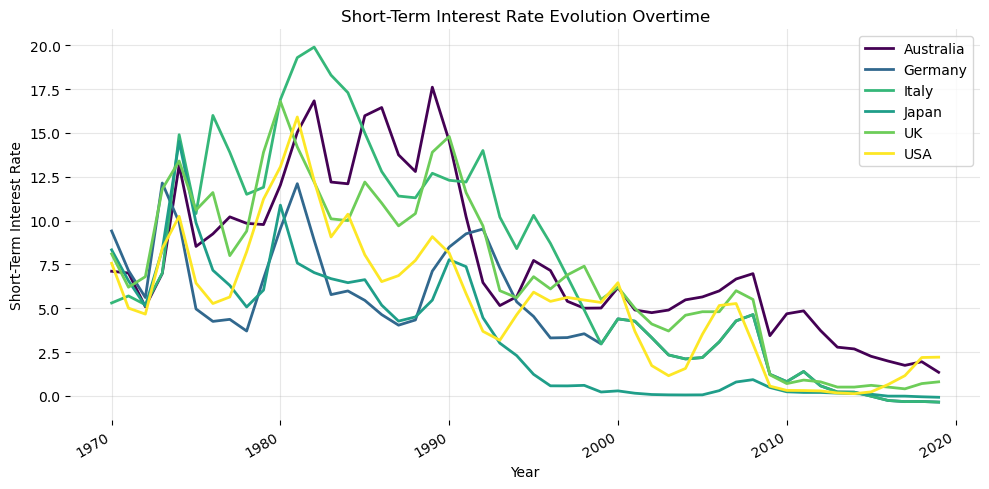

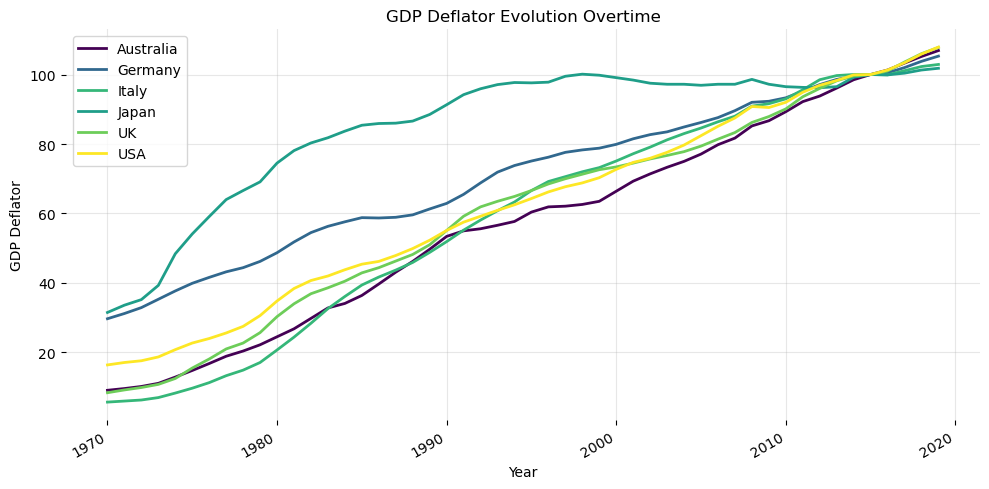

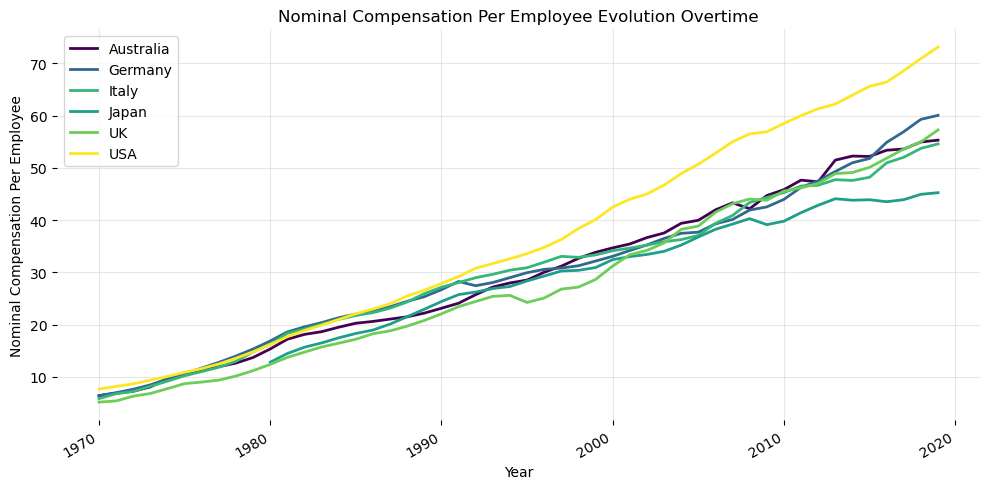

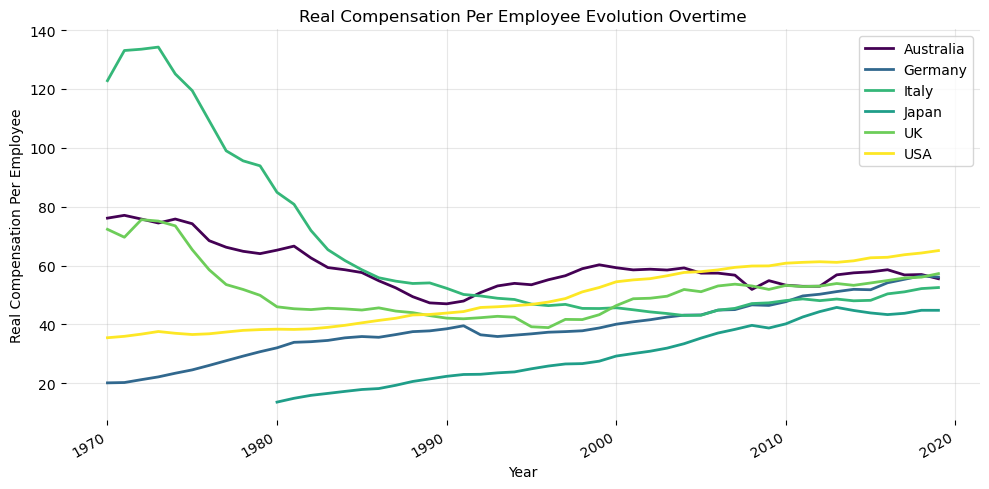

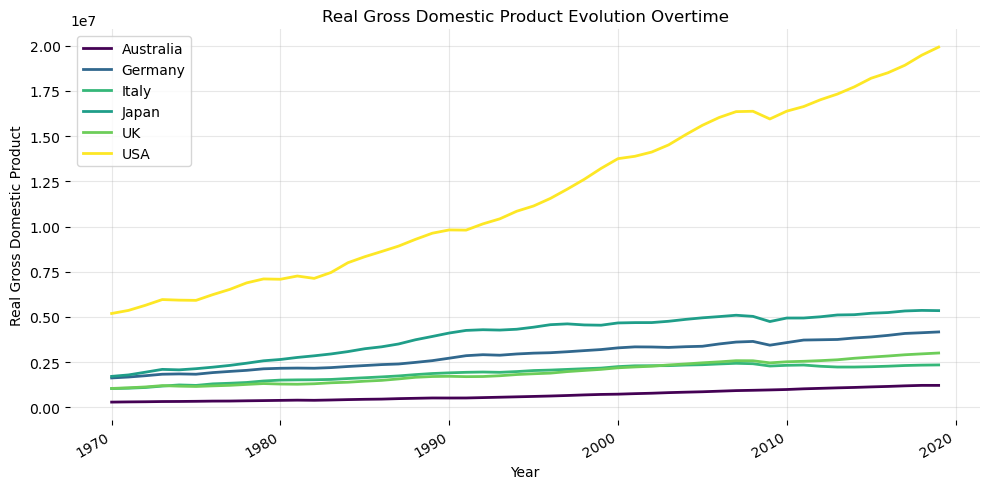

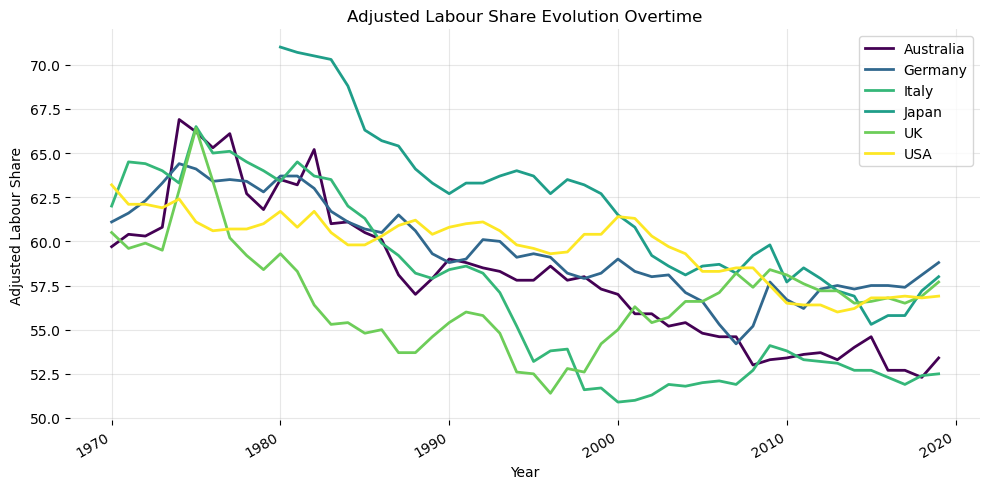

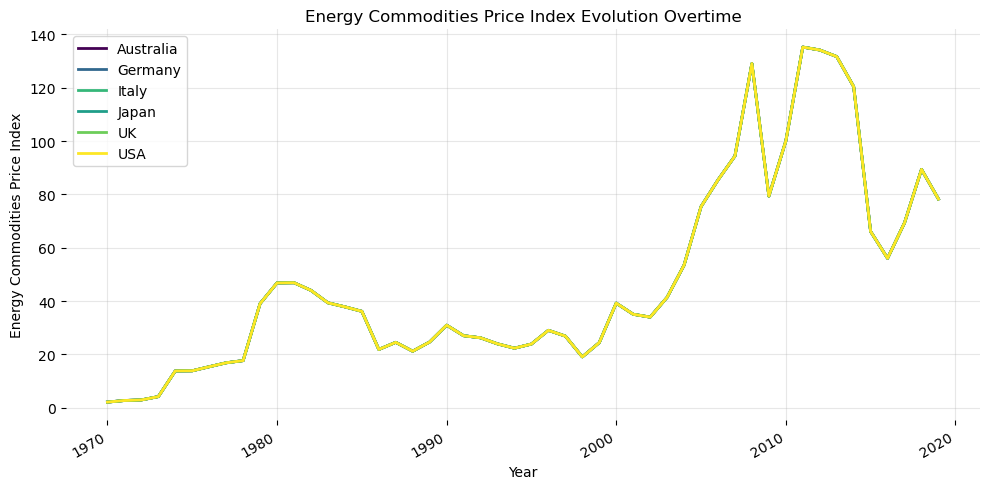

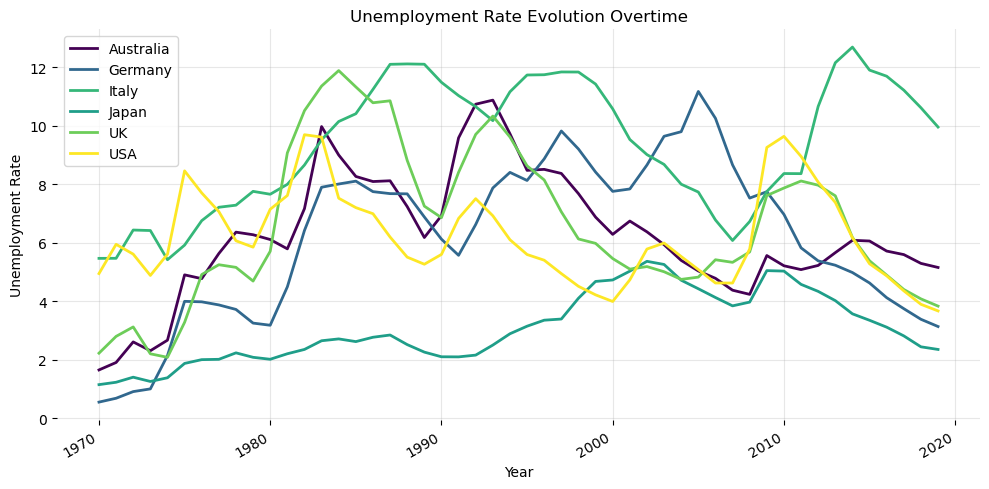

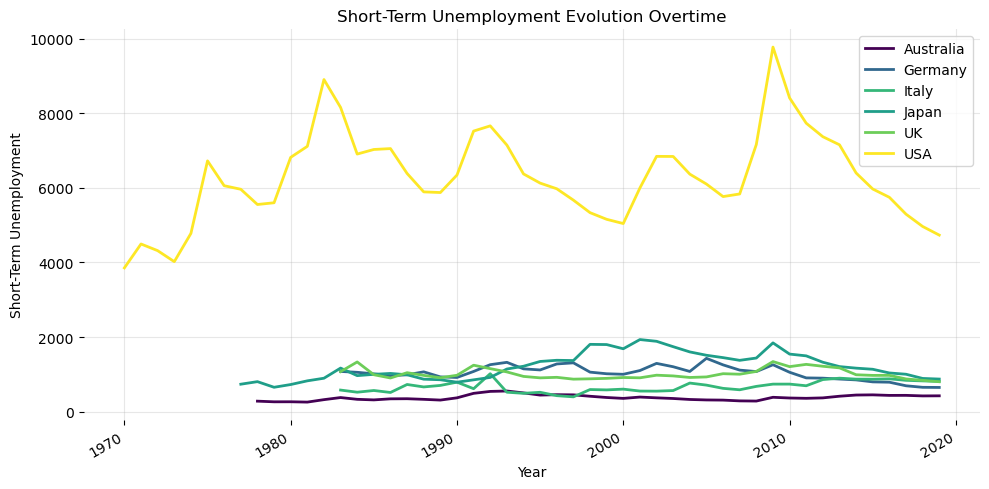

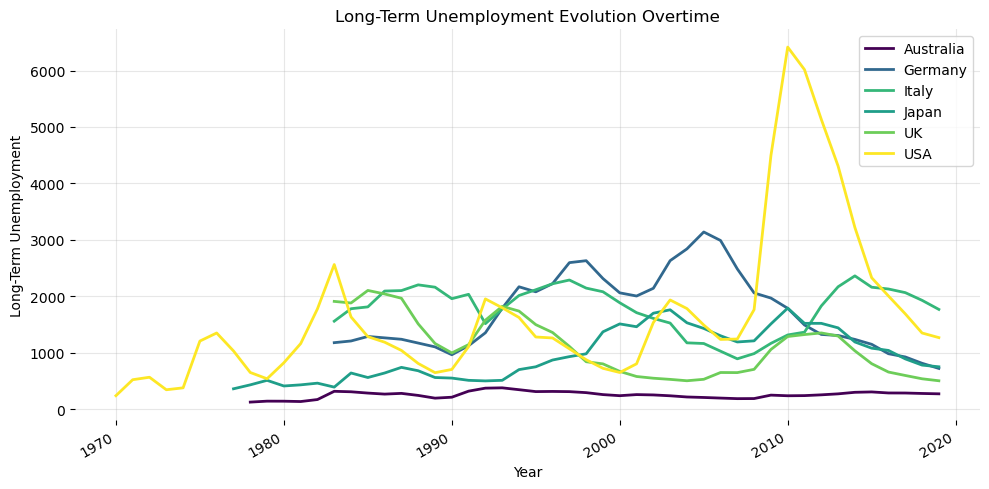

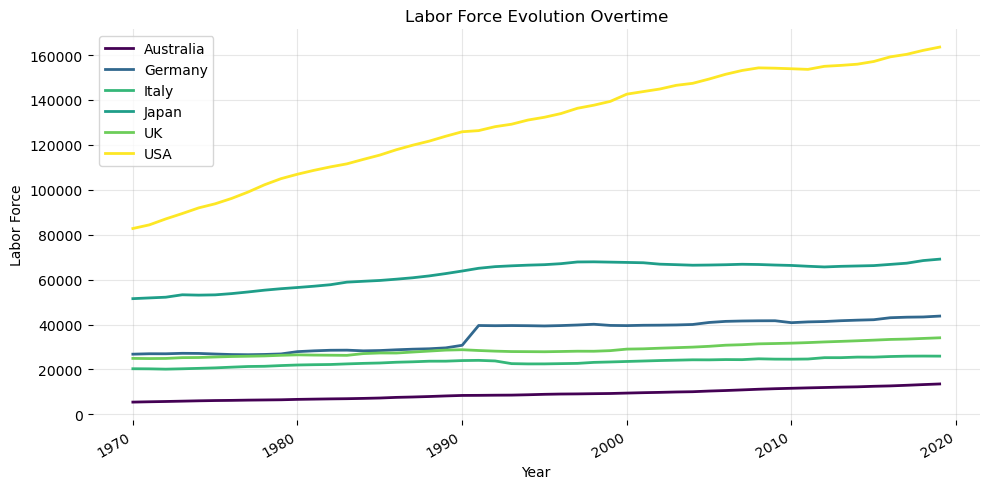

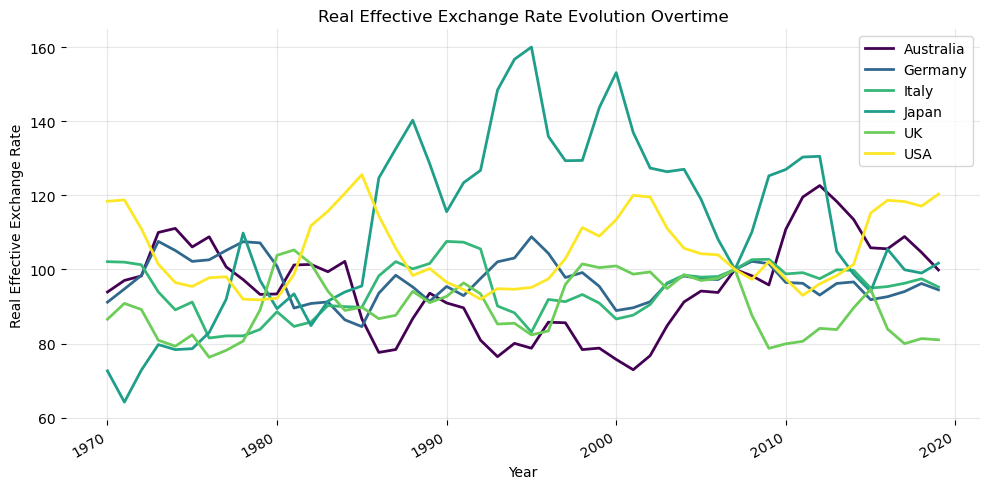

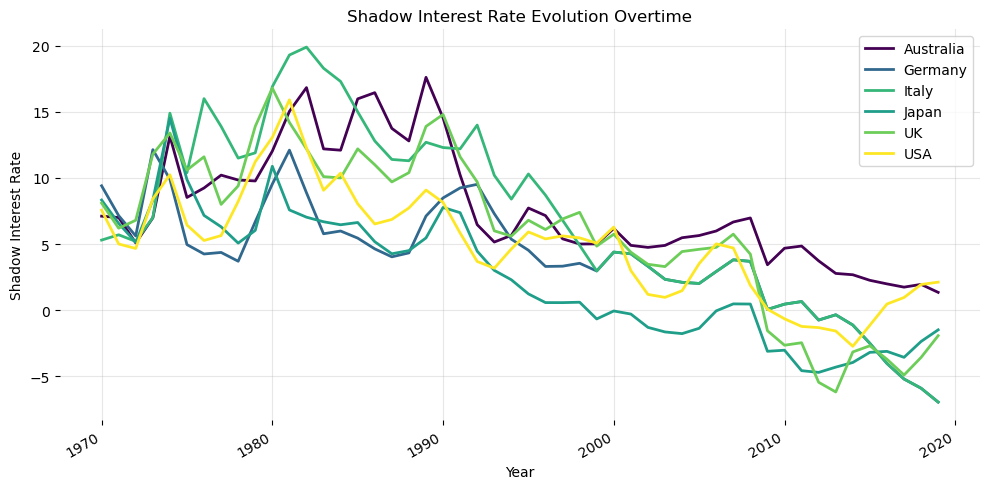

In [32]:
# Over time plotting 

#/////////
# Plotting
#/////////
# Loop on variable (without country and time)
for var in plot_data.columns: 
# (!!!) nice way to exclude country (index not var)
    if var == "Country":
        continue
# Plot set-up
    fig, ax = plt.subplots(figsize=(10, 5))
# Loop on country
# (!!!) Check countries naming
    for country in target_countries: 
        df = plot_data[plot_data["Country"].str.contains(country, na=False)]
        df = df[["Country", var]]
# (!!!) Drop nan only for those columns (var) that result affected by missing values (NOT ALL) or we will lose observations also from healthy variables
        affected_var = [
            "Nominal Compensation Per Employee", 
            "Real Compensation Per Employee", 
            "Adjusted Labour Share", 
            "Unemployment Rate", 
            "SHORTUN",
            "Long-Term Unemployment",
            "Labor Force"
        ]
        if var in affected_var:
            df = df.dropna(subset=var)
        ax.plot(
            df.index,
            df[var],
            label=country,
            linewidth=2,
            color = country_colors.get(country)
        )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_title(f"{var} Evolution Overtime")
    ax.set_xlabel("Year")
    ax.set_ylabel(f"{var}")
    ax.grid(True, alpha=0.3)
    ax.legend()

    fig.autofmt_xdate()

    plt.tight_layout()
    plt.show()

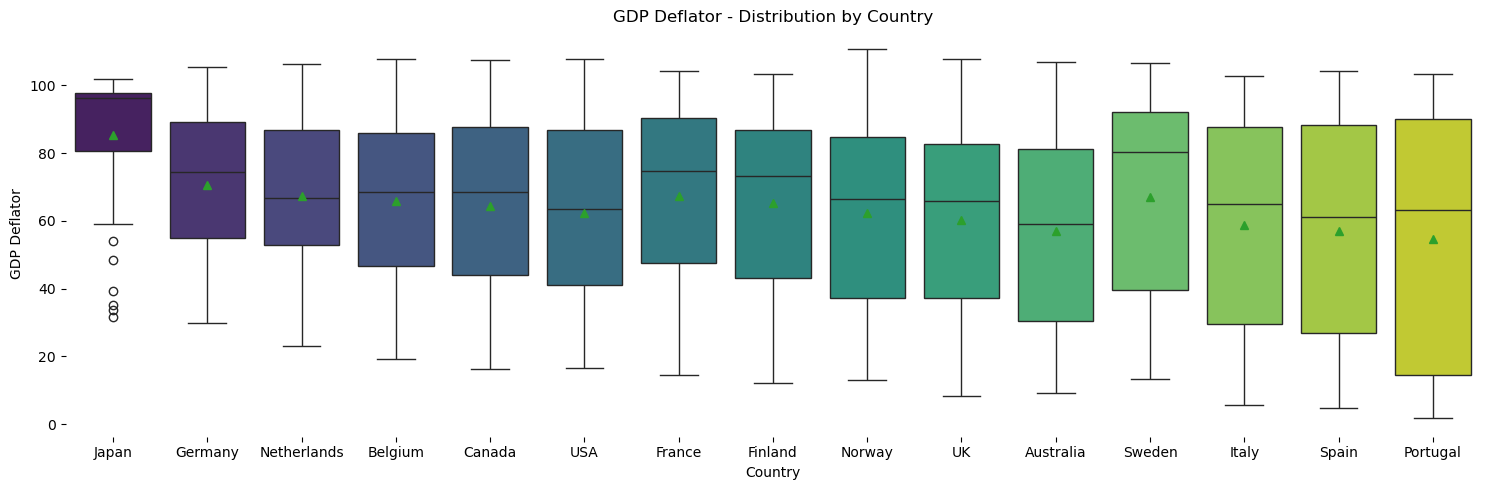

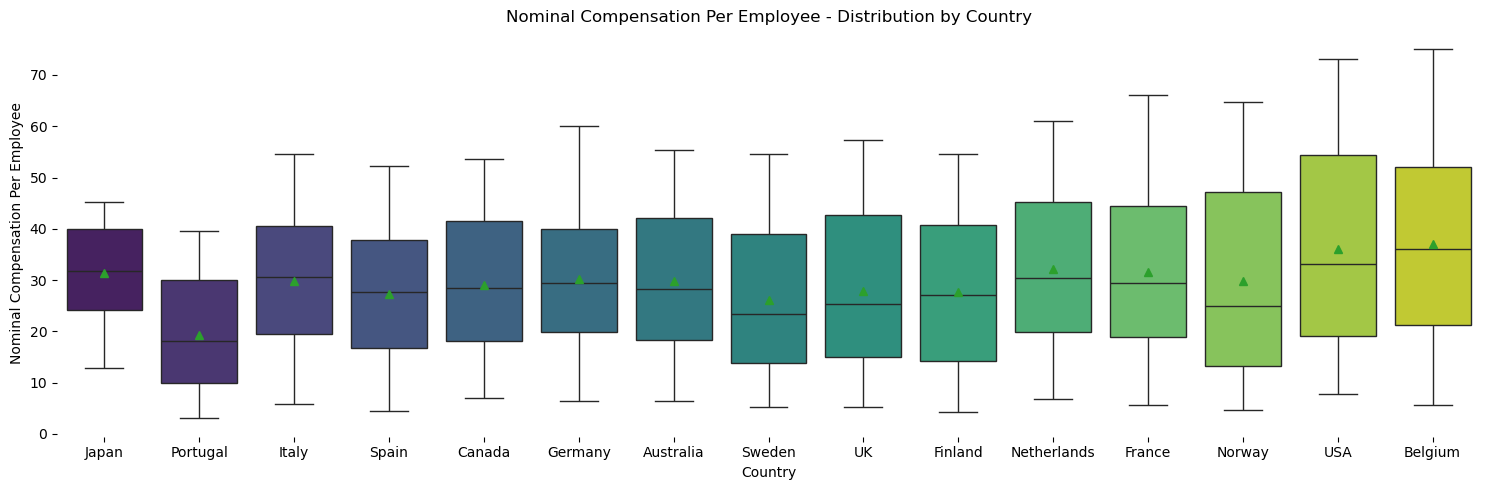

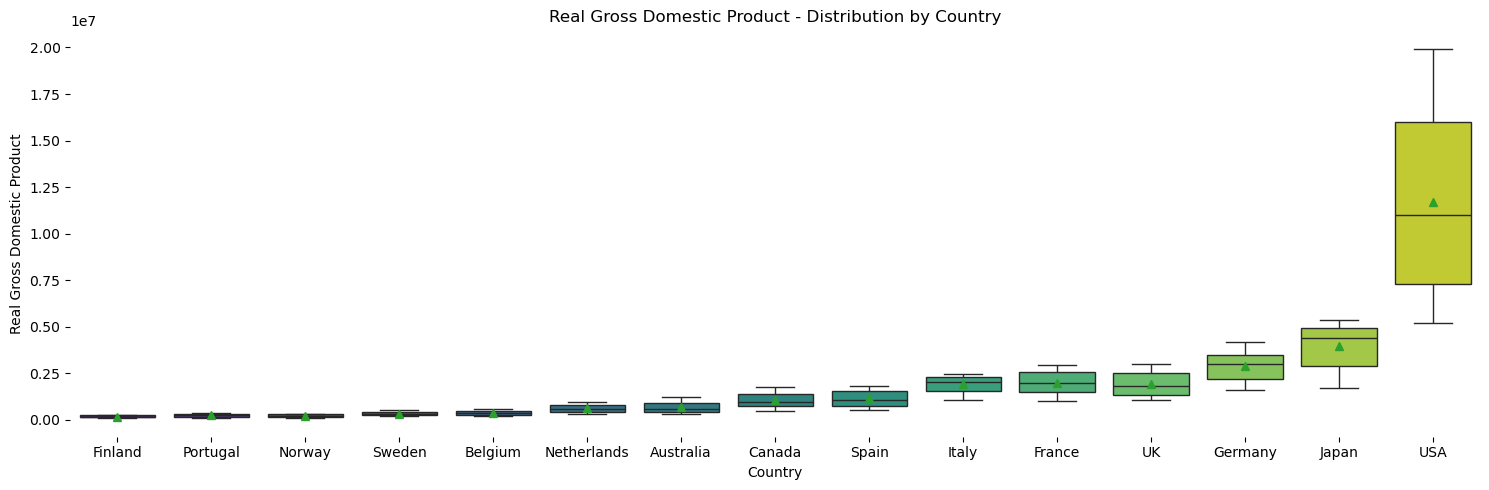

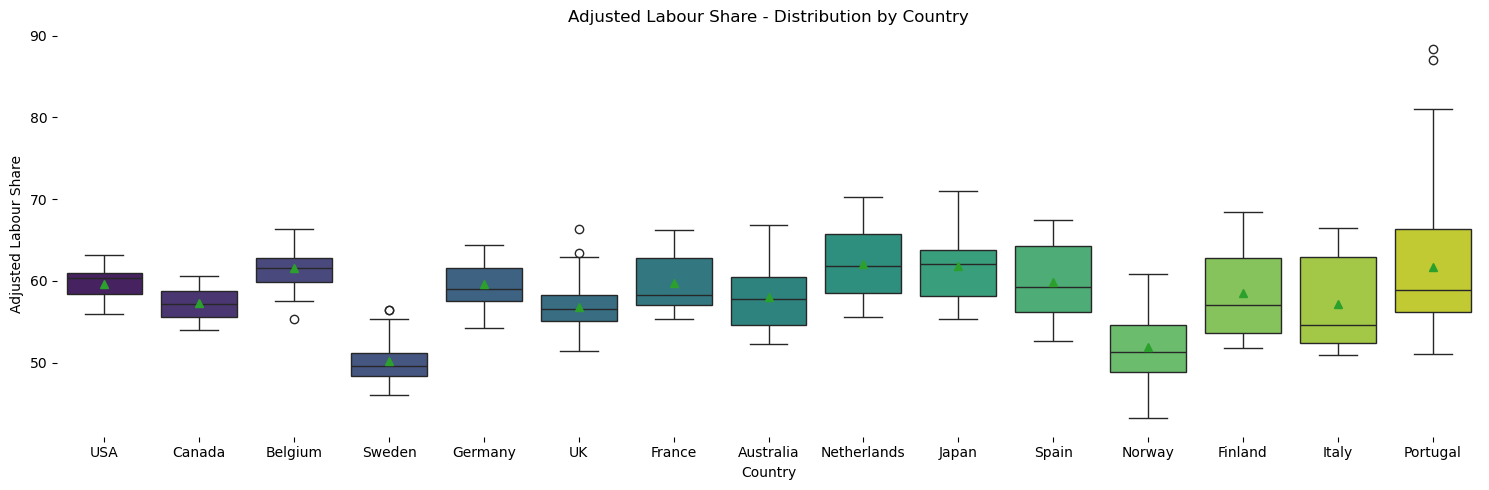

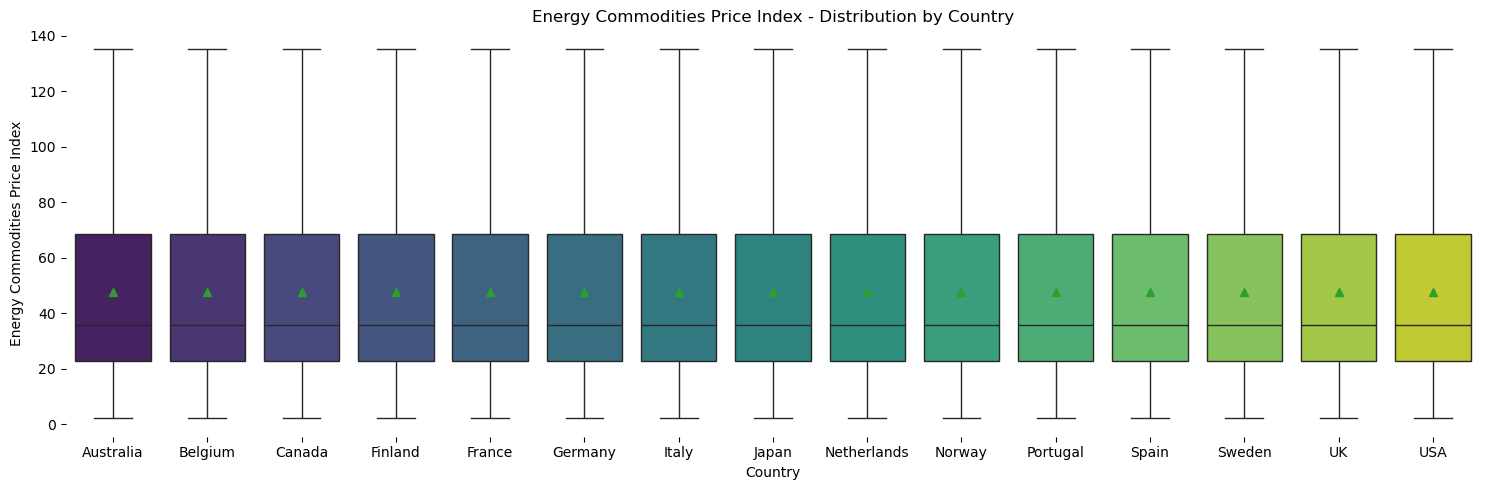

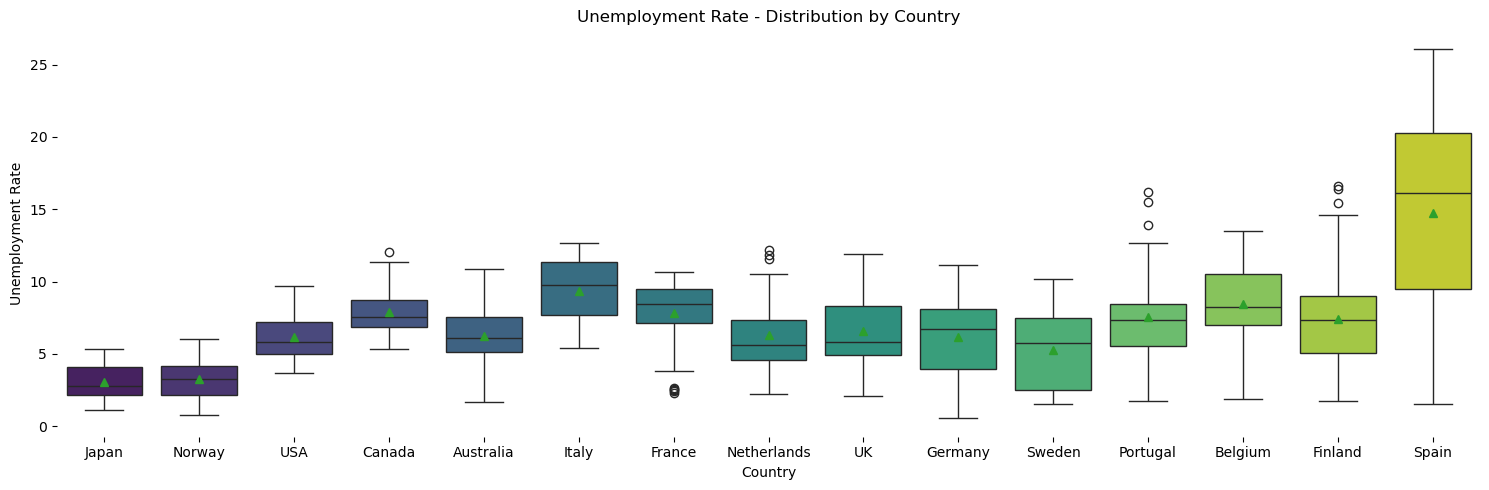

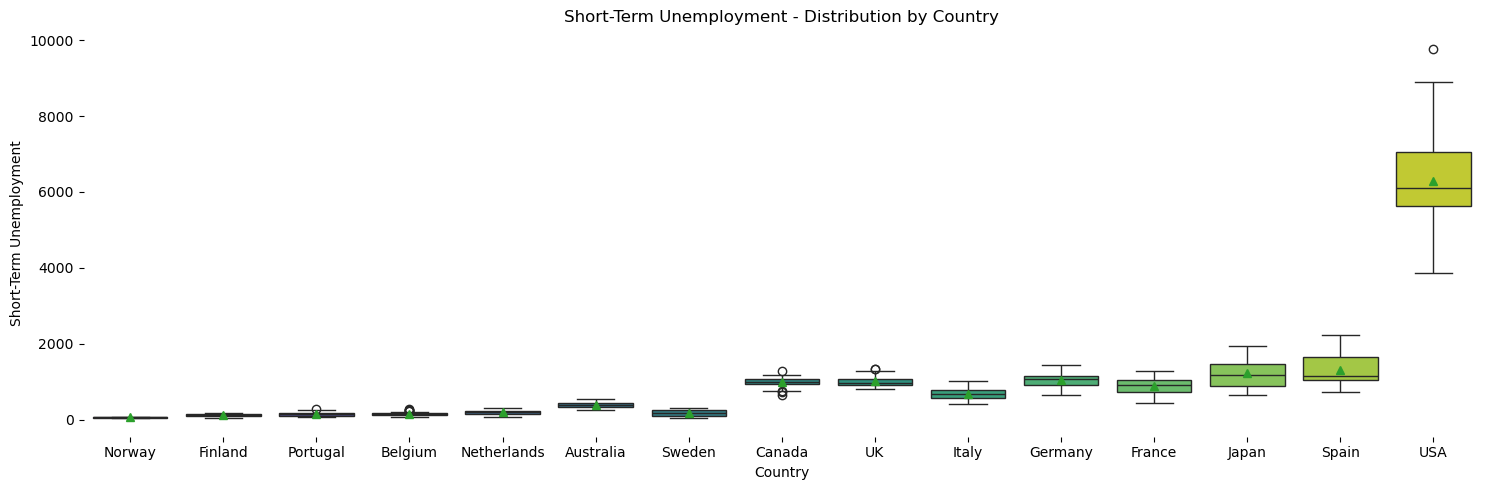

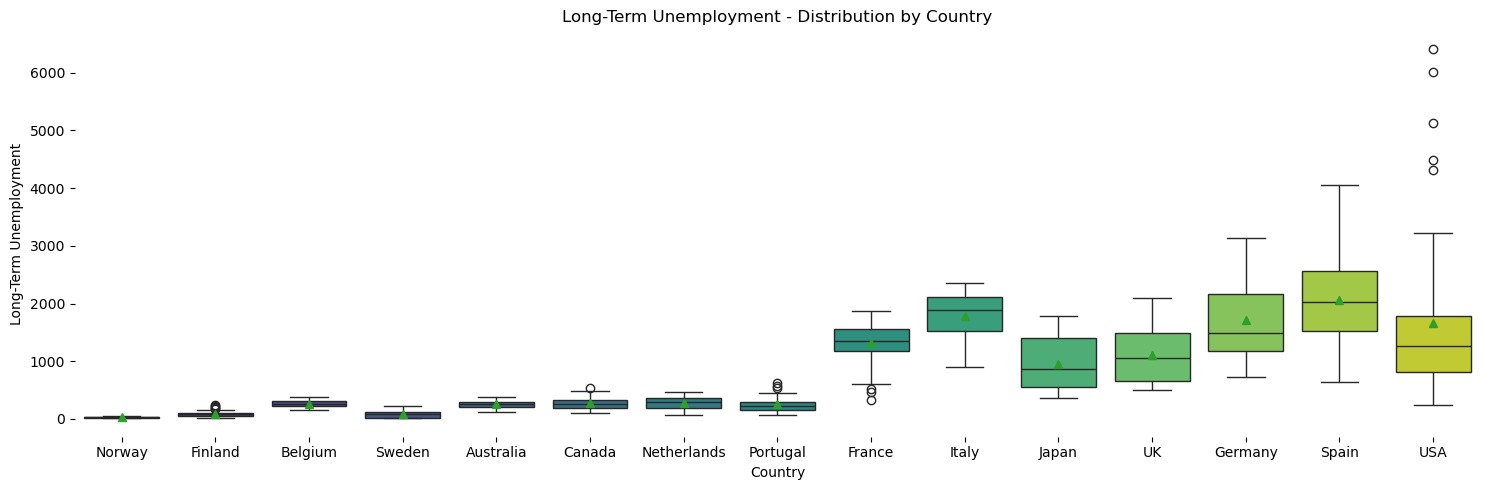

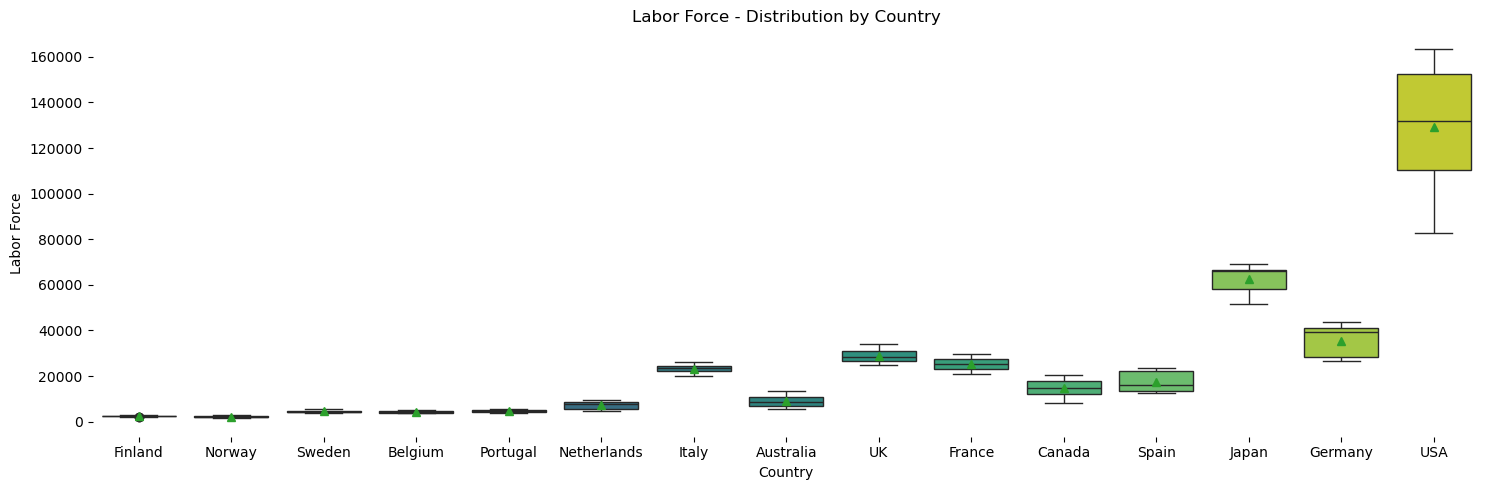

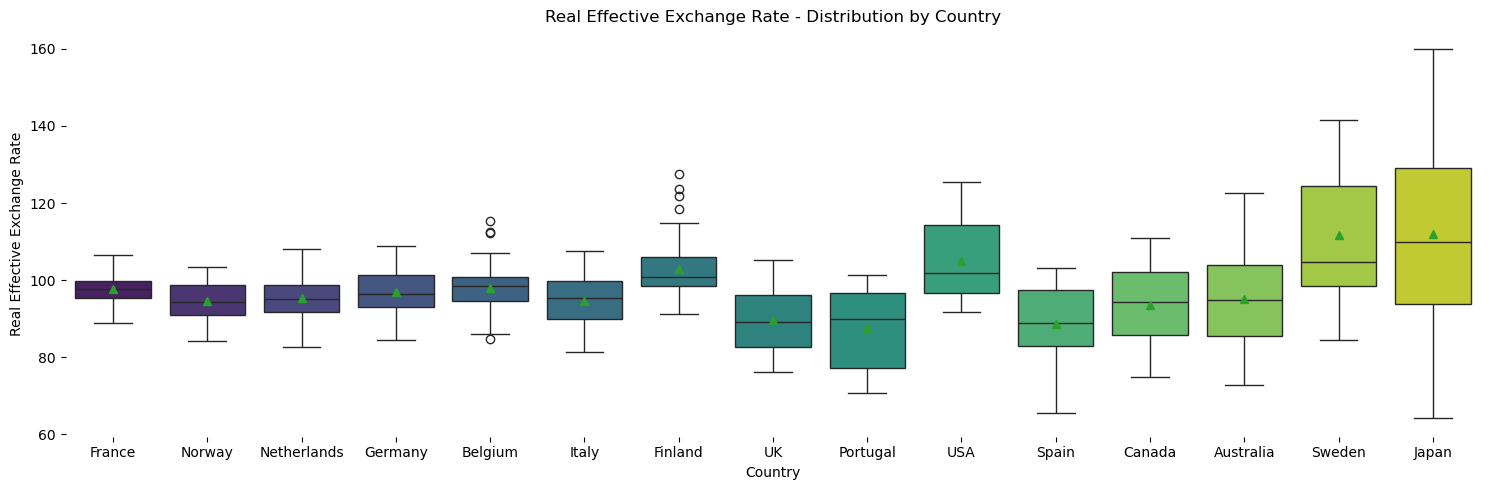

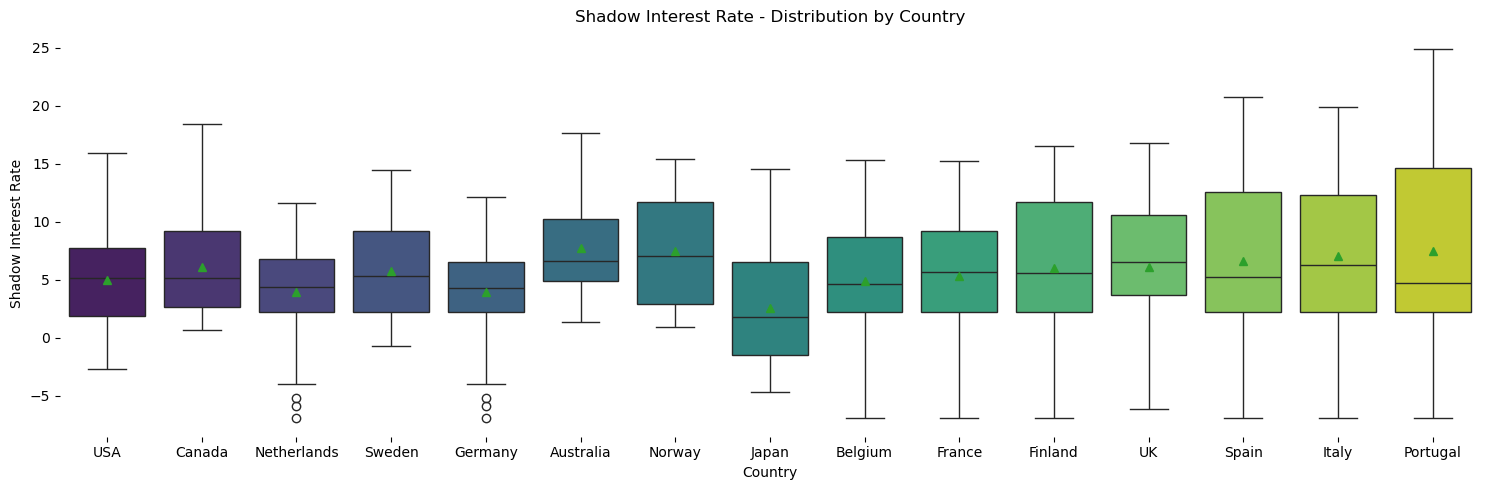

In [33]:
# Classic Variable Boxplot

#/////////
# Plotting
#/////////
# Loop on variable (without country and time)
for var in plot_data.columns: 
# (!!!) nice way to exclude country (index not var)
    if var == "Country":
        continue
# (!!!) NaN cleaning
    df = plot_data.copy()
    df = df[["Country", var]]
# (!!!) Drop nan only for those columns (var) that result affected by missing values (NOT ALL) or we will lose observations also from healthy variables
    affected_var = [
        "Nominal Compensation Per Employee", 
        "Real Compensation Per Employee", 
        "Adjusted Labour Share", 
        "Unemployment Rate", 
        "Short-Term Unemployment",
        "Long-Term Unemployment",
        "Labor Force"
    ]
    if var in affected_var:
        df = df.dropna(subset=var)
# We wanto to order countries by variance to be plugged in sns under the call "order"
# (!!!) DO not call it stats or it will clashes with the library scipy.stats
    statistics = (
        df.groupby("Country")[var]
        .agg(var="var", n="count")
        .dropna(subset=["var"])
    )
    statistics = statistics[statistics["n"] >= 2]
    if statistics.empty:
        continue
# (!!!) This is essential cuz the order must be unique (no more than one country can be associated to the same index number)
    country_order = statistics.sort_values("var").index
    country_order = pd.Index(country_order).unique().tolist()
# We define the palette following past graphs design
    pal = sns.color_palette("viridis", n_colors=len(country_order))

# Plot set-up
    fig, ax = plt.subplots(figsize=(15, 5))
    
    sns.boxplot(
        data=df,
        x="Country",
        y=var,
        showmeans=True,
        order=country_order,
        ax=ax,
        palette=pal
    )
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_title(f"{var} - Distribution by Country")
    ax.set_xlabel("Country")
    ax.set_ylabel(var)

    plt.tight_layout()
    plt.show()


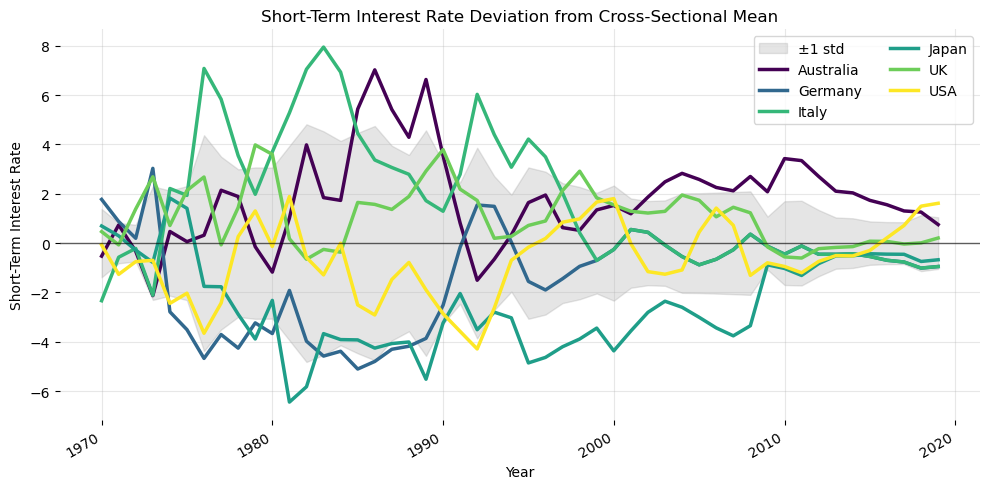

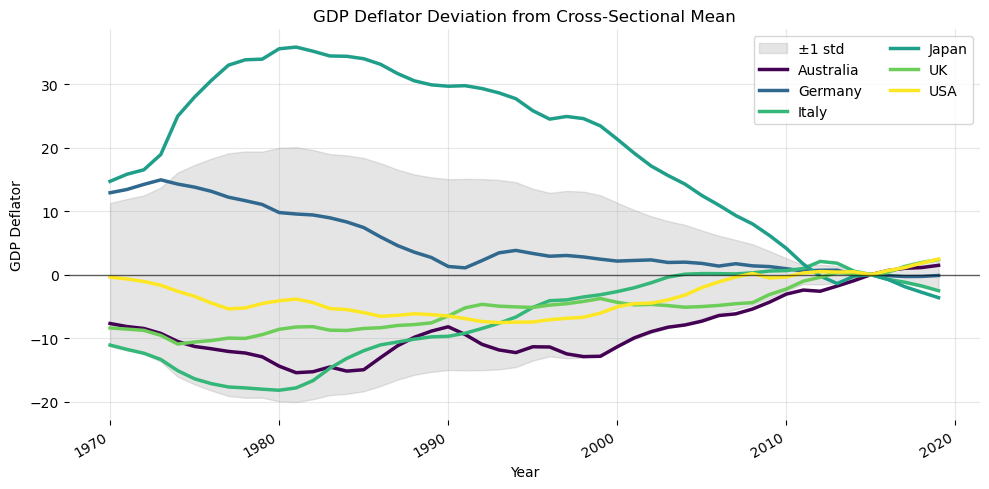

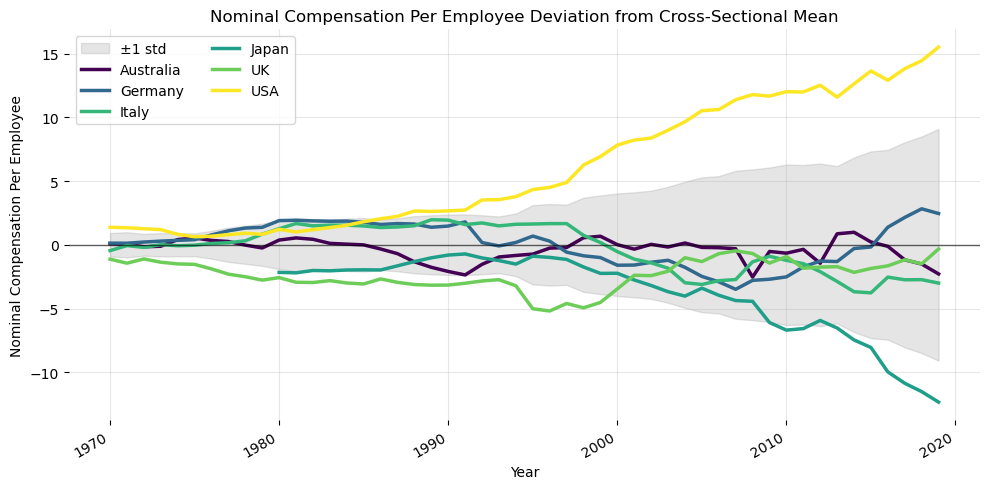

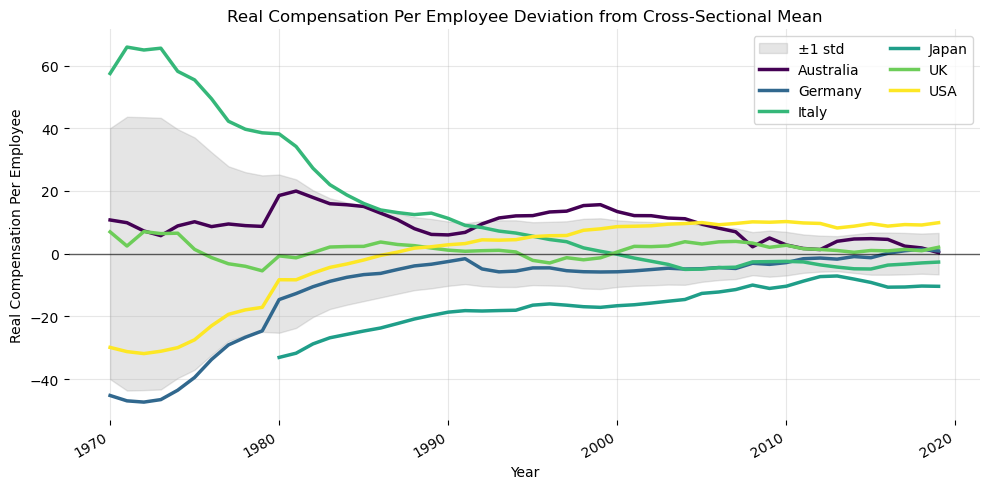

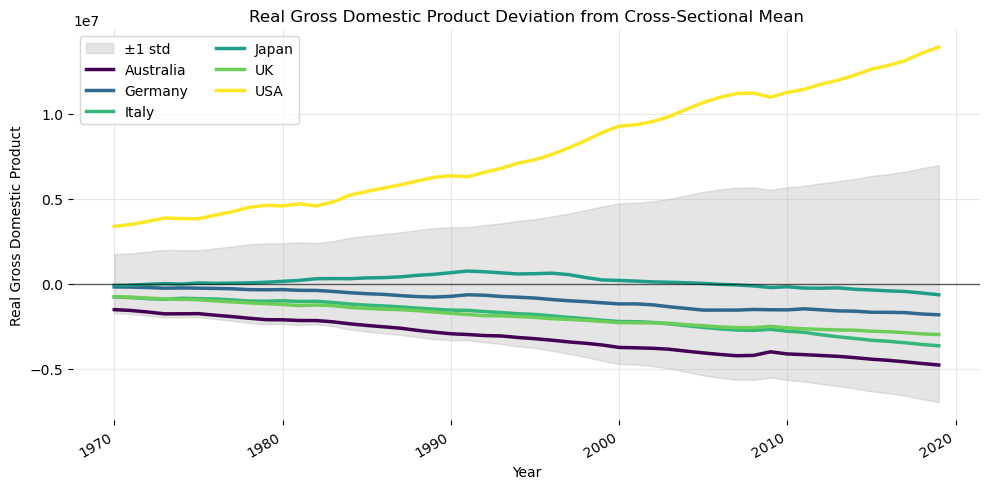

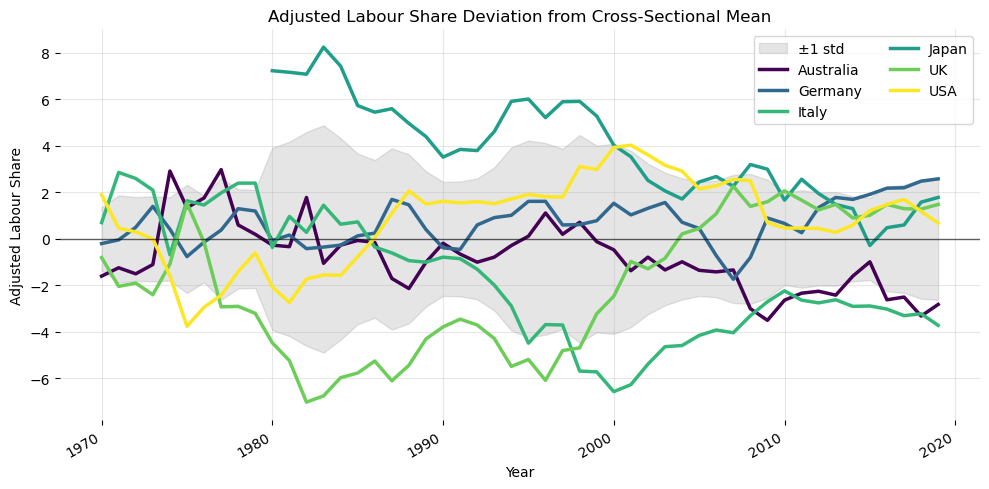

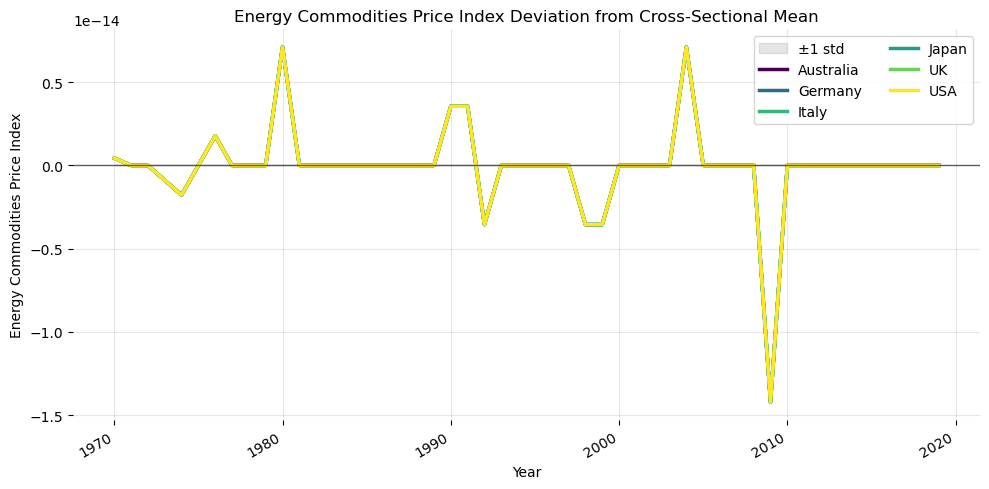

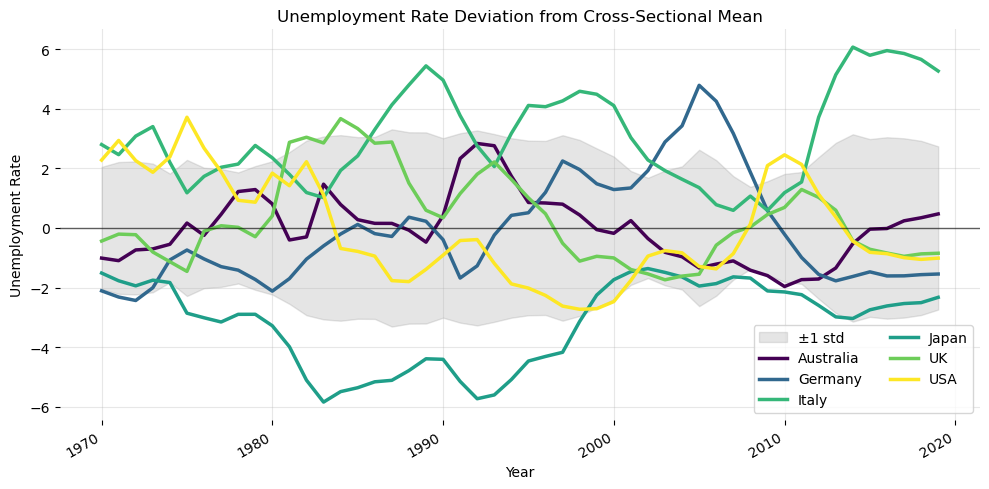

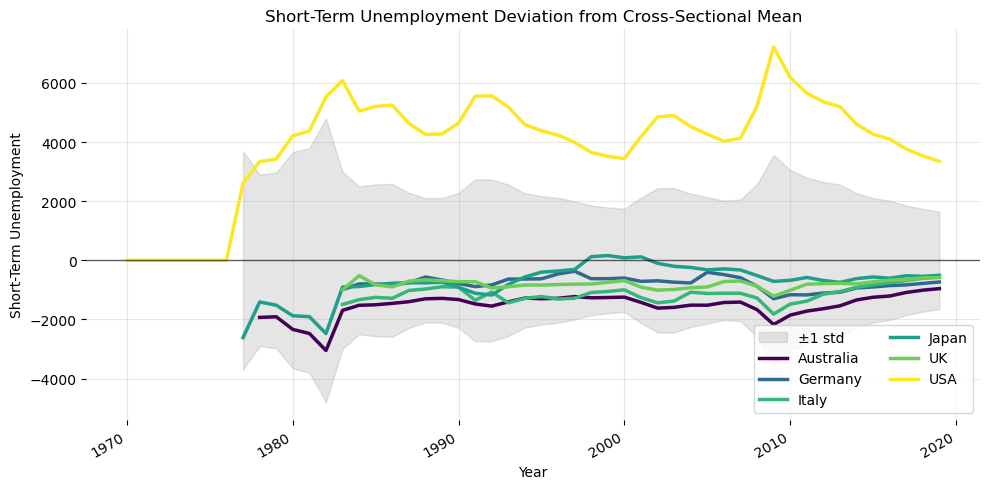

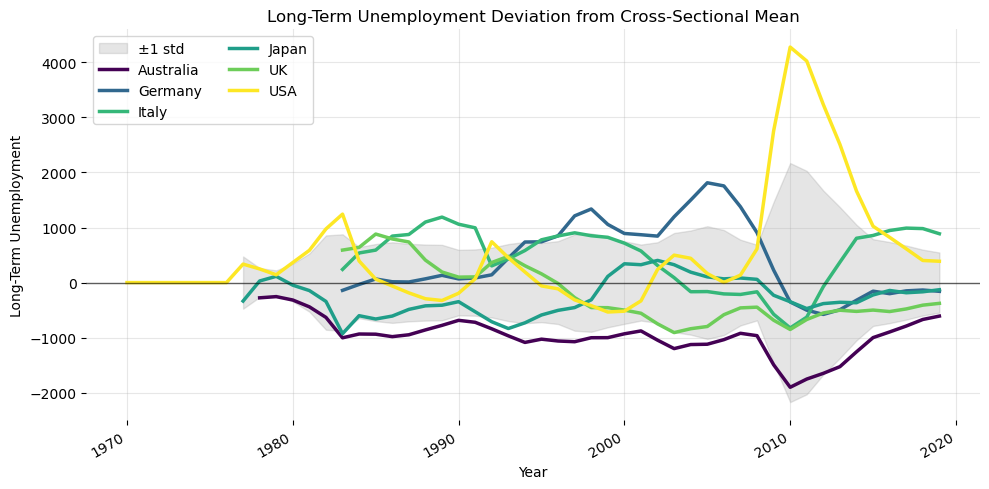

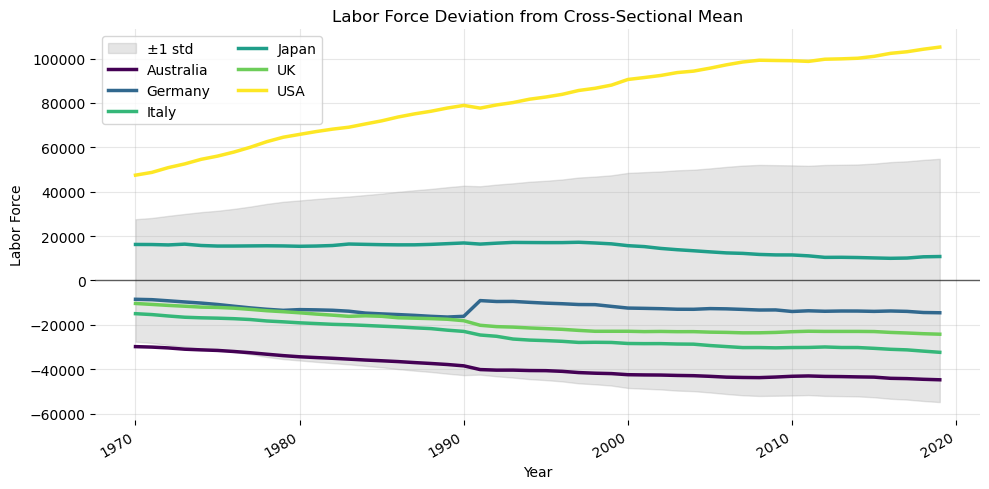

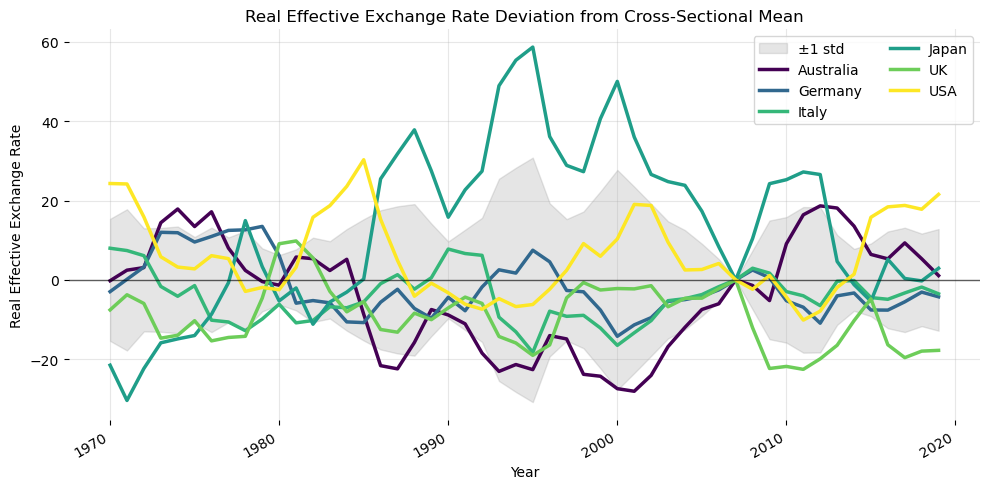

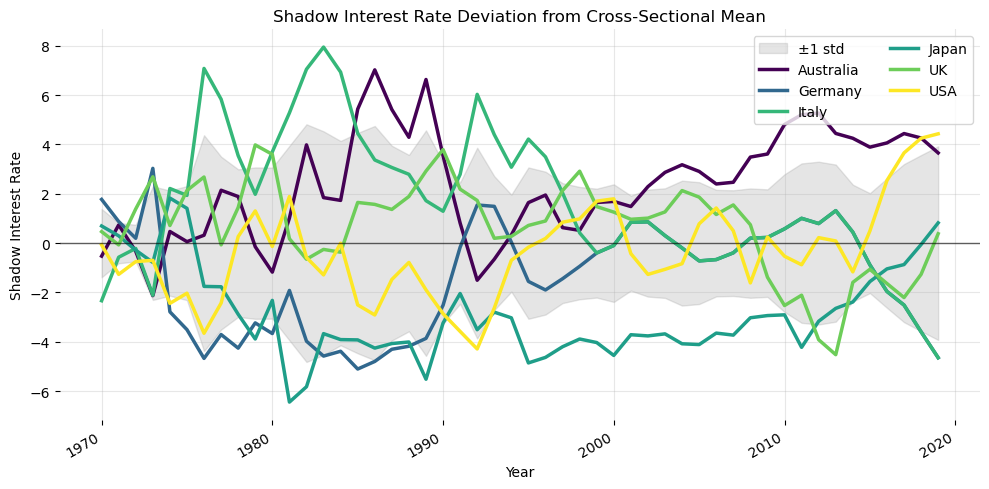

In [34]:
# Deviation from Cross-Sectional Mean plotting
# (x_it - X_t.)
# (!!!) individual invariant 

#/////////
# Plotting
#/////////
# Loop on variable (without country and time)
for var in plot_data.columns: 
# (!!!) nice way to exclude country (index not var)
    if var == "Country":
        continue
# Plot set-up
    fig, ax = plt.subplots(figsize=(10, 5))
# We create a wide panel to extract the cross-sectional mean
    sub = plot_data[plot_data["Country"].isin(target_countries)].copy()
    wide = (
        sub.pivot_table(index=sub.index, columns="Country", values=var, aggfunc="mean")
        .sort_index()
    )

    mean_t = wide.mean(axis=1)
    dev = wide.sub(mean_t, axis=0)
    std_t = dev.std(axis=1)
    ax.fill_between(
        dev.index,
        -std_t,
        std_t,
        color="grey",
        alpha=0.2,
        label="±1 std"
    )

    for country in dev.columns:
        is_highlight = country in target_countries

        ax.plot(
            dev.index,
            dev[country],
            linewidth=2.5 if is_highlight else 1.5,
            alpha=1.0 if is_highlight else 0.4,
            color=country_colors.get(country, "grey"),
            label=country if is_highlight else None
        )
    
    ax.axhline(0, color="black", linewidth=1, alpha=0.6)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_title(f"{var} Deviation from Cross-Sectional Mean")
    ax.set_xlabel("Year")
    ax.set_ylabel(f"{var}")
    ax.grid(True, alpha=0.3)
    ax.legend(ncol=2)

    fig.autofmt_xdate()

    plt.tight_layout()
    plt.show()

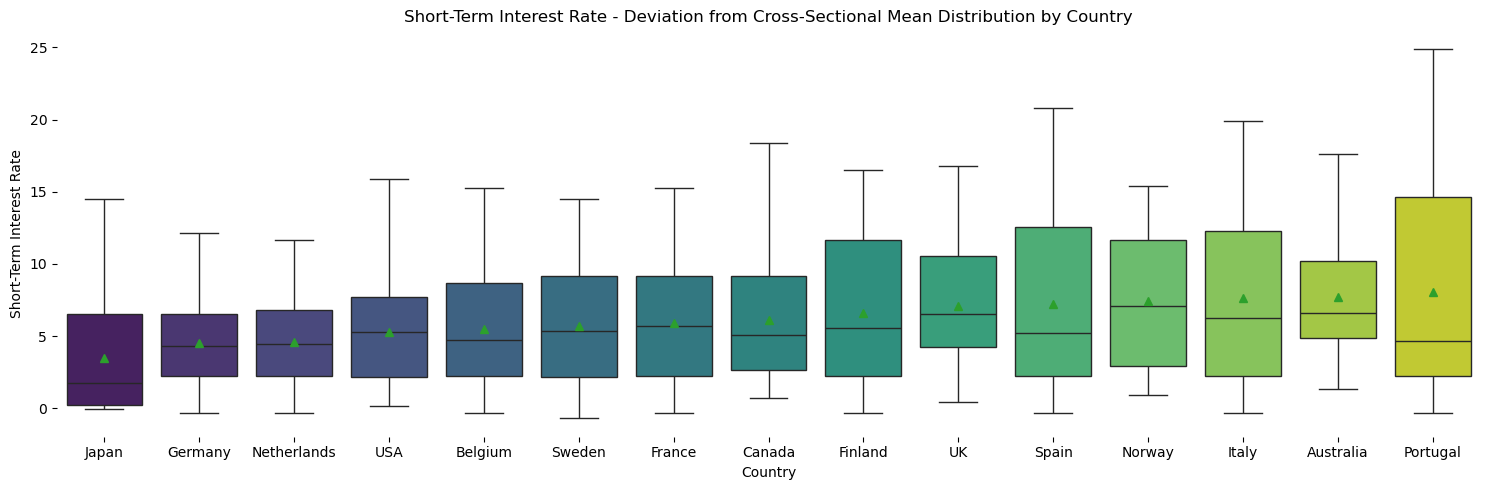

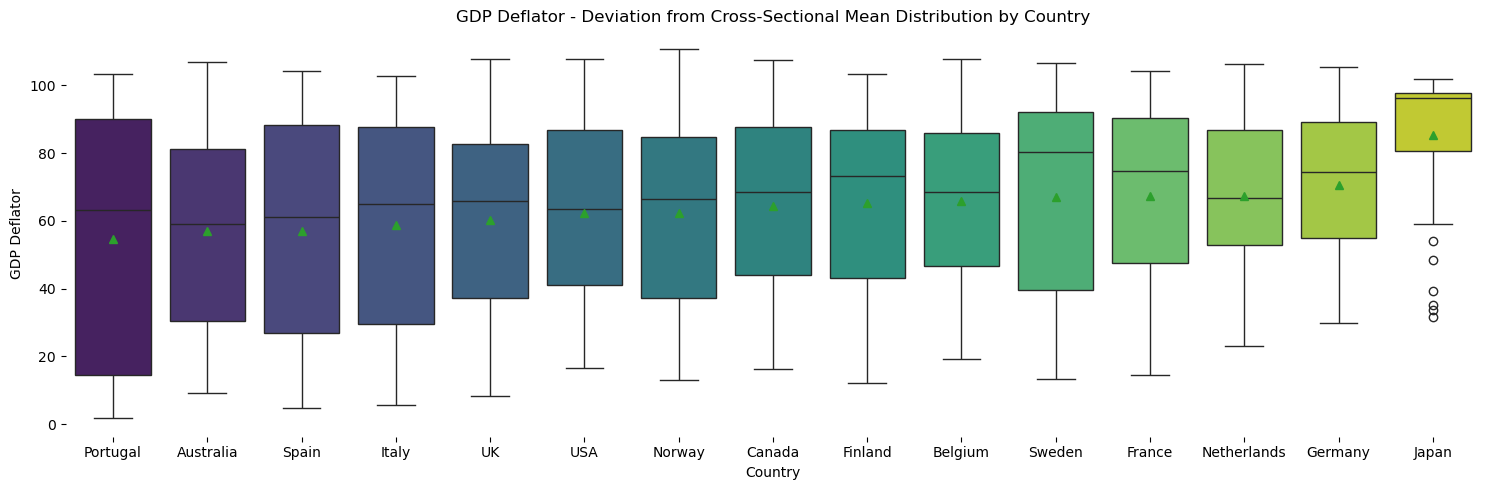

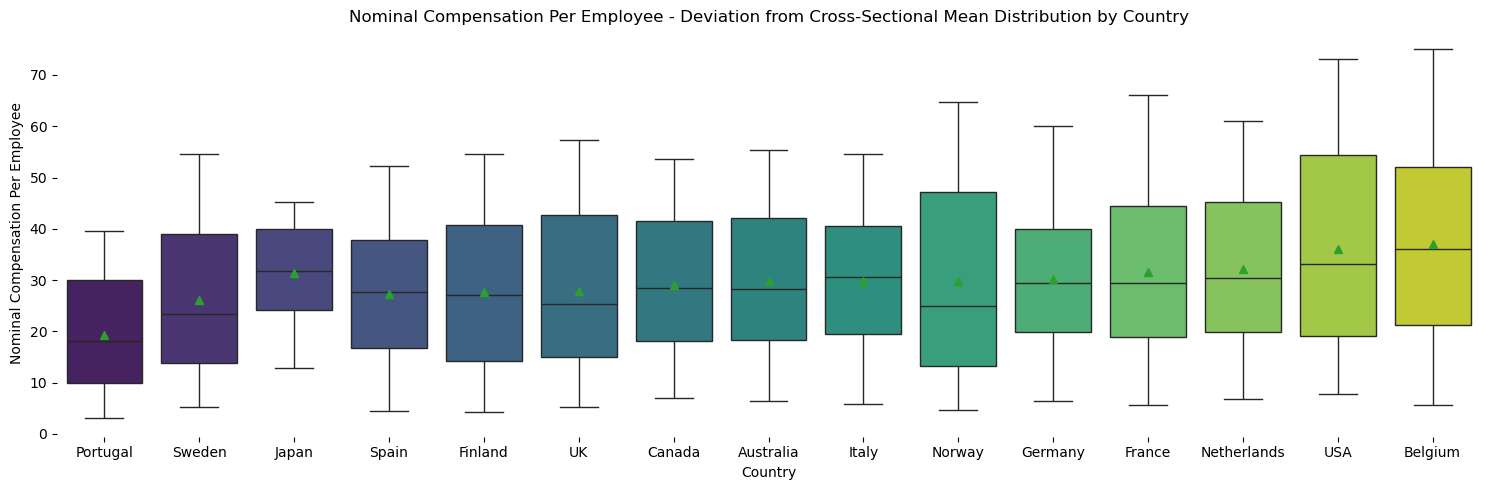

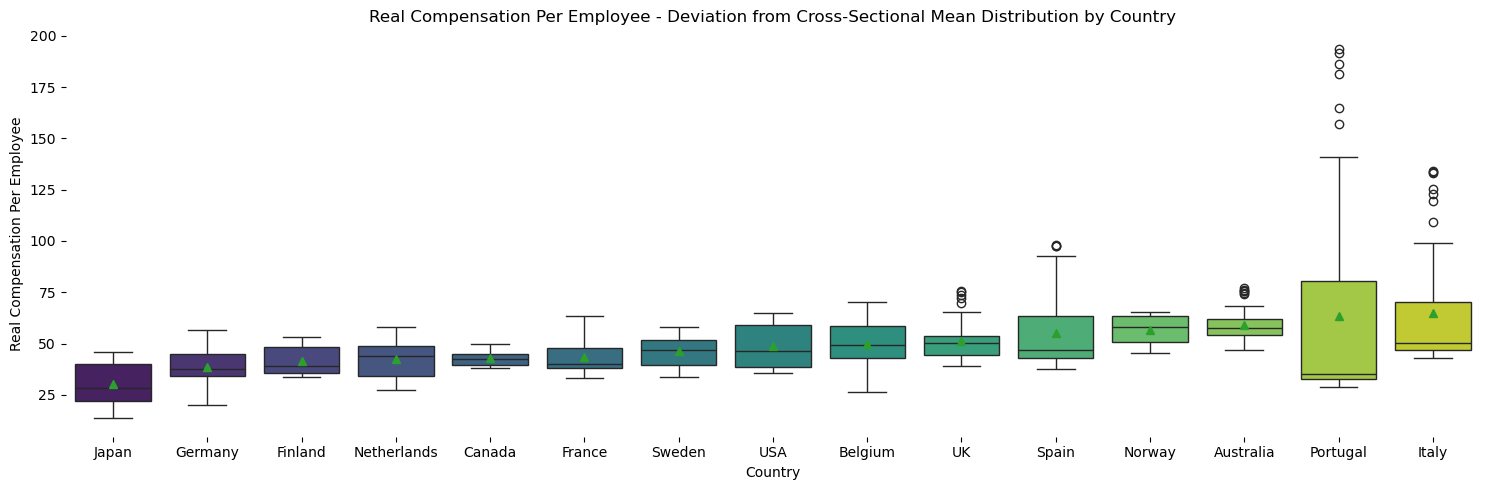

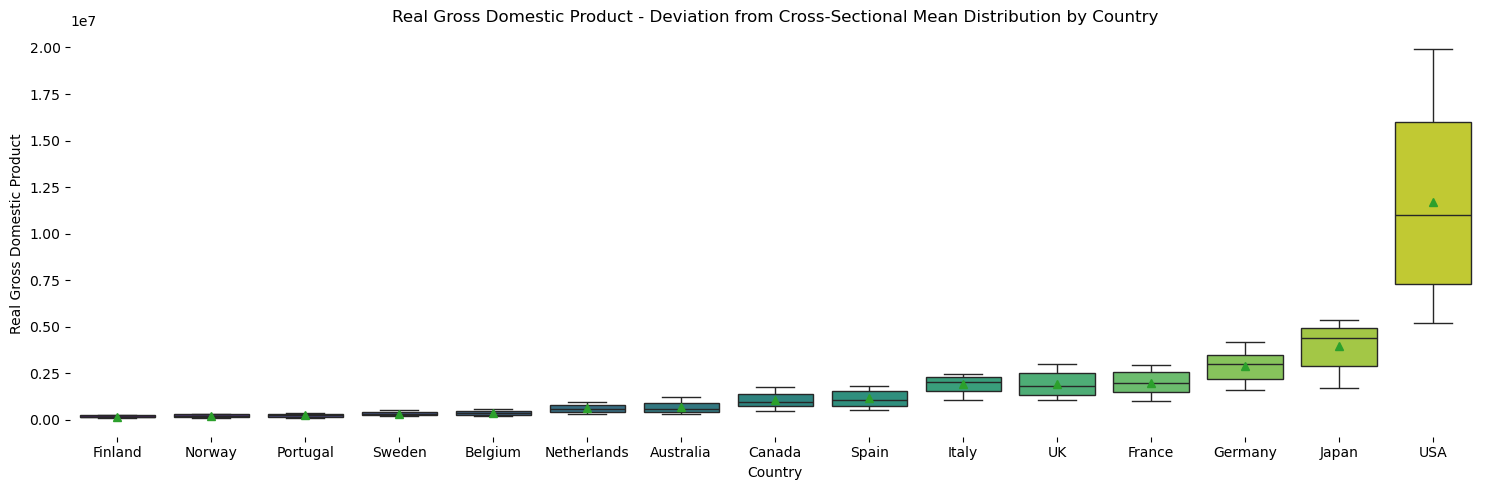

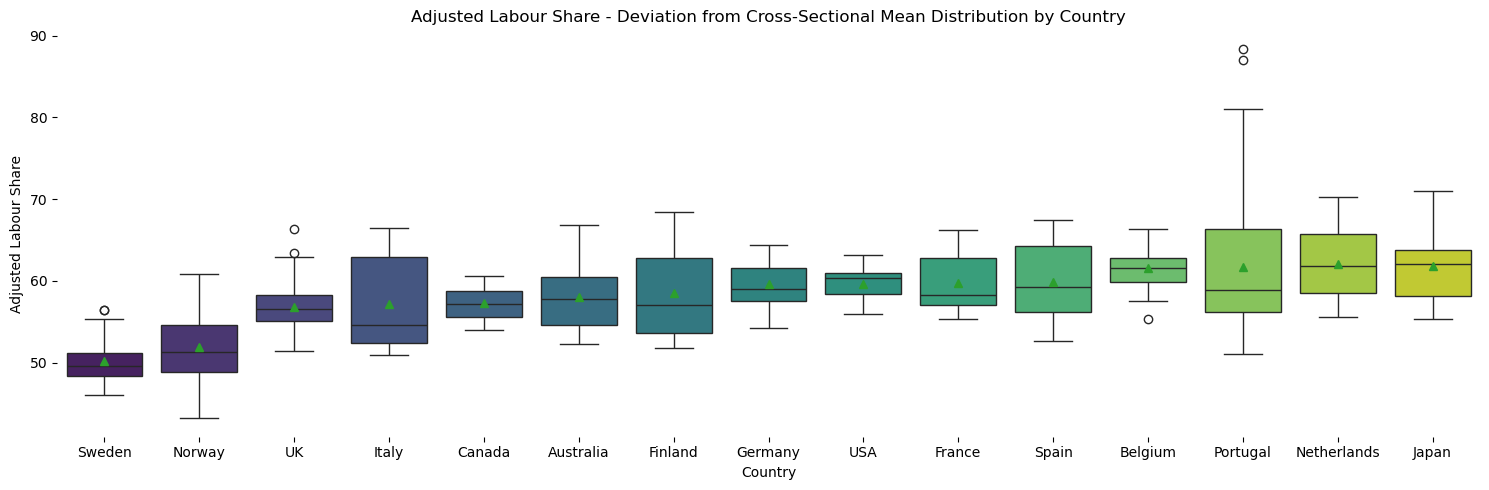

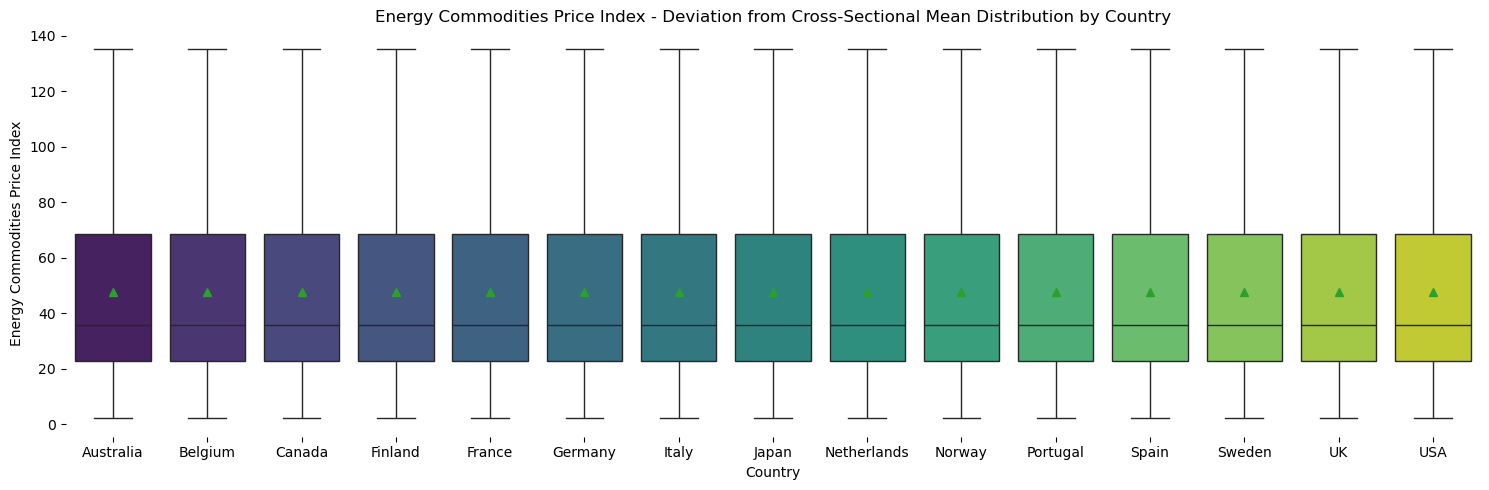

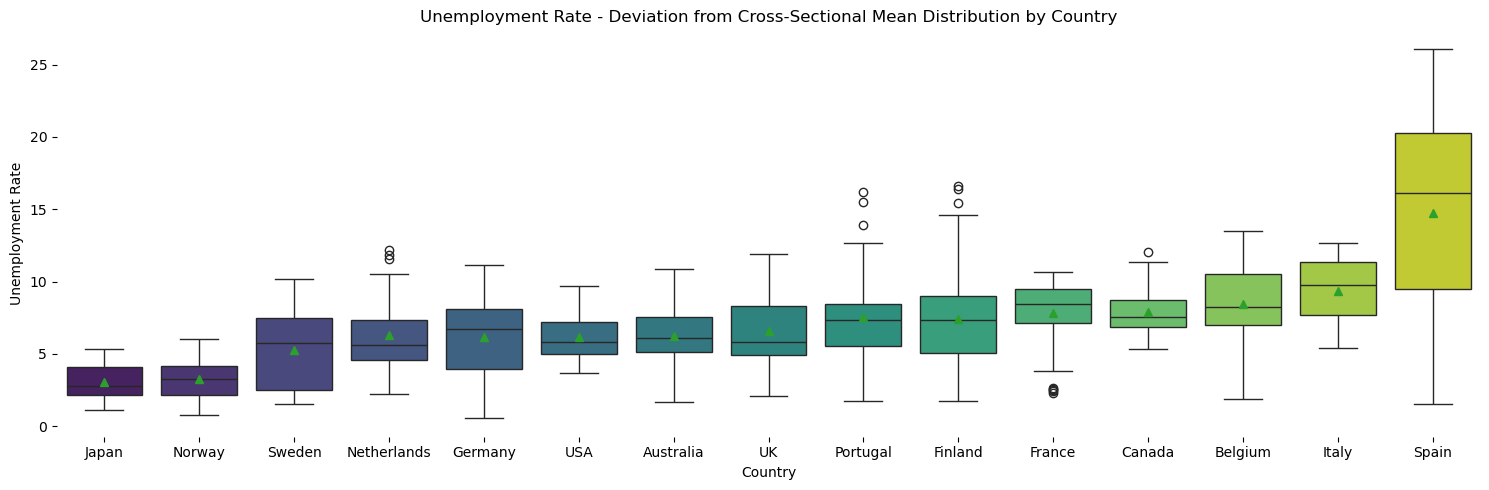

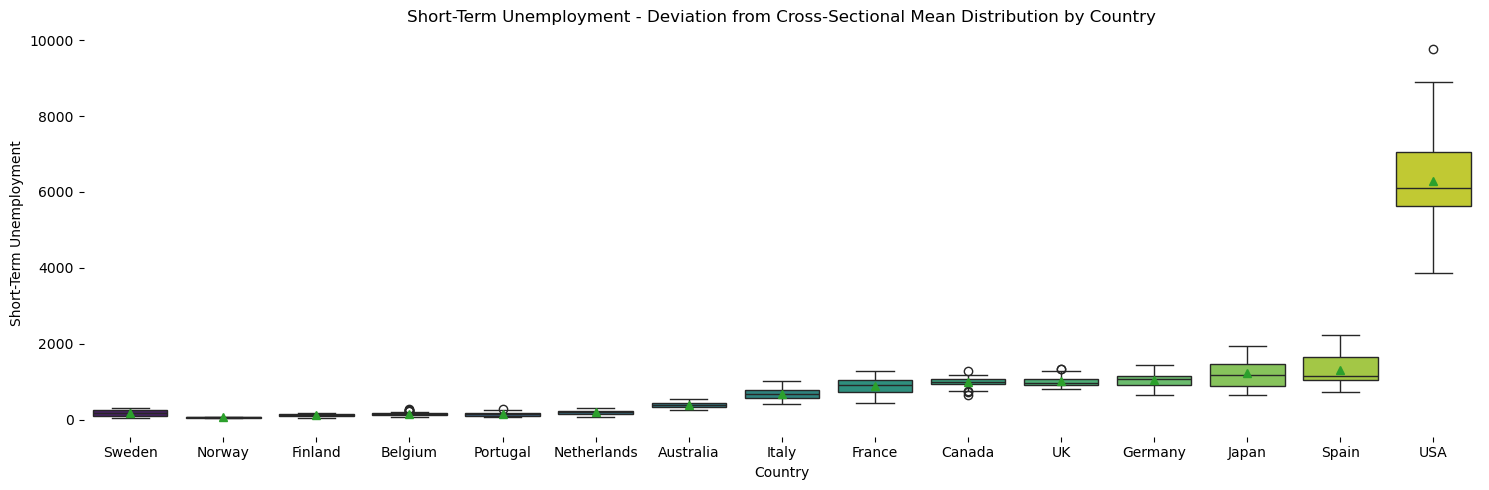

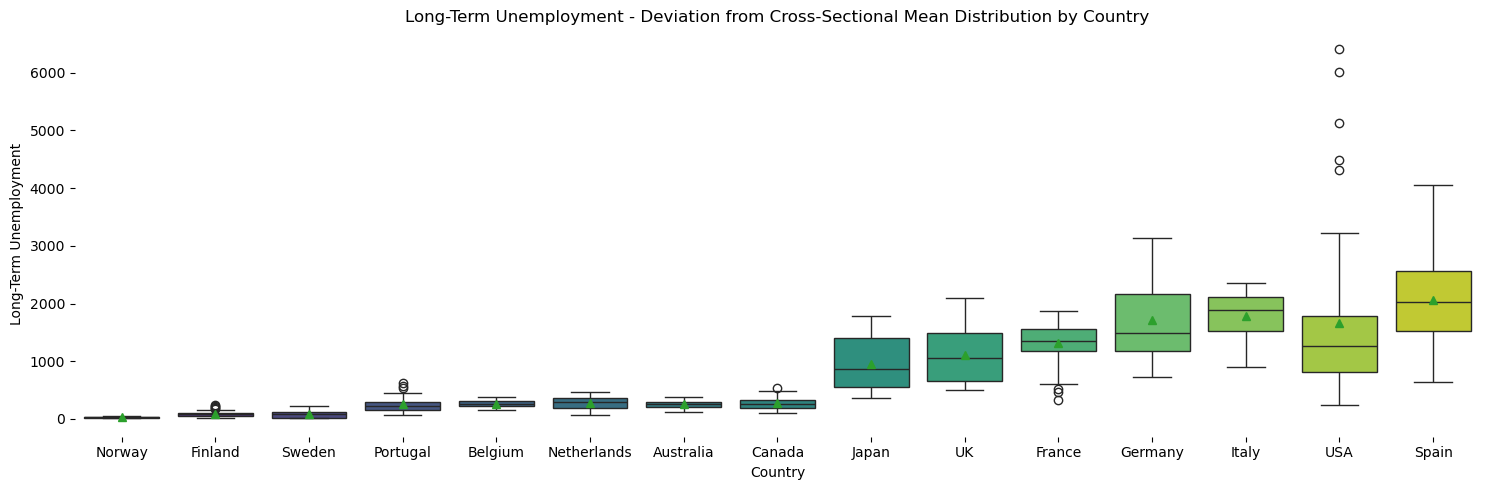

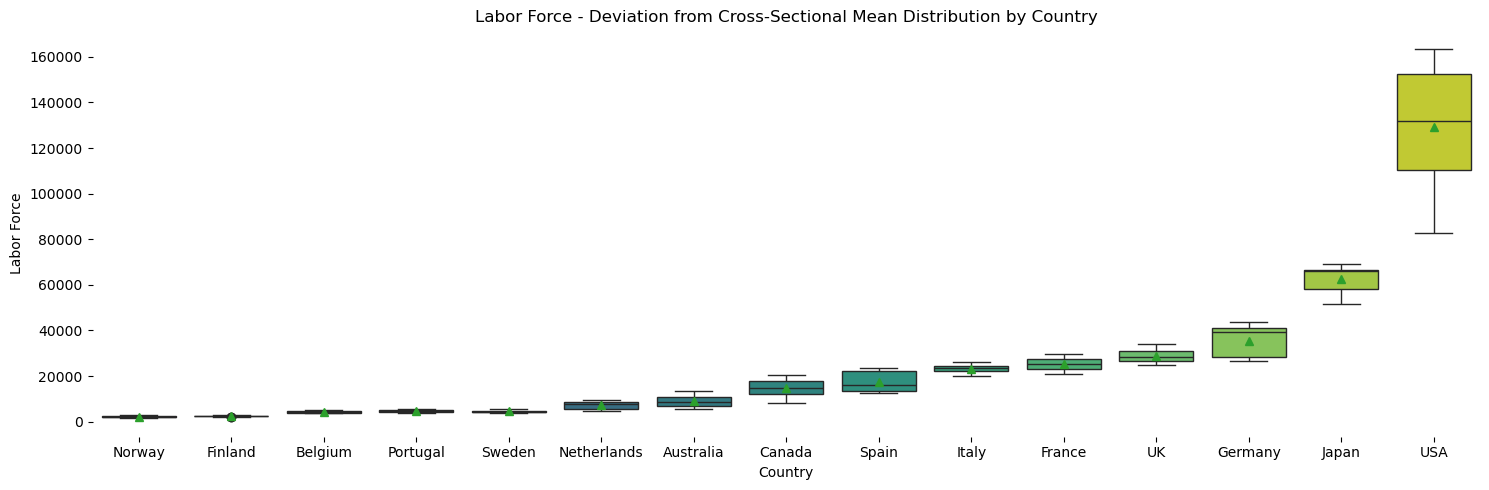

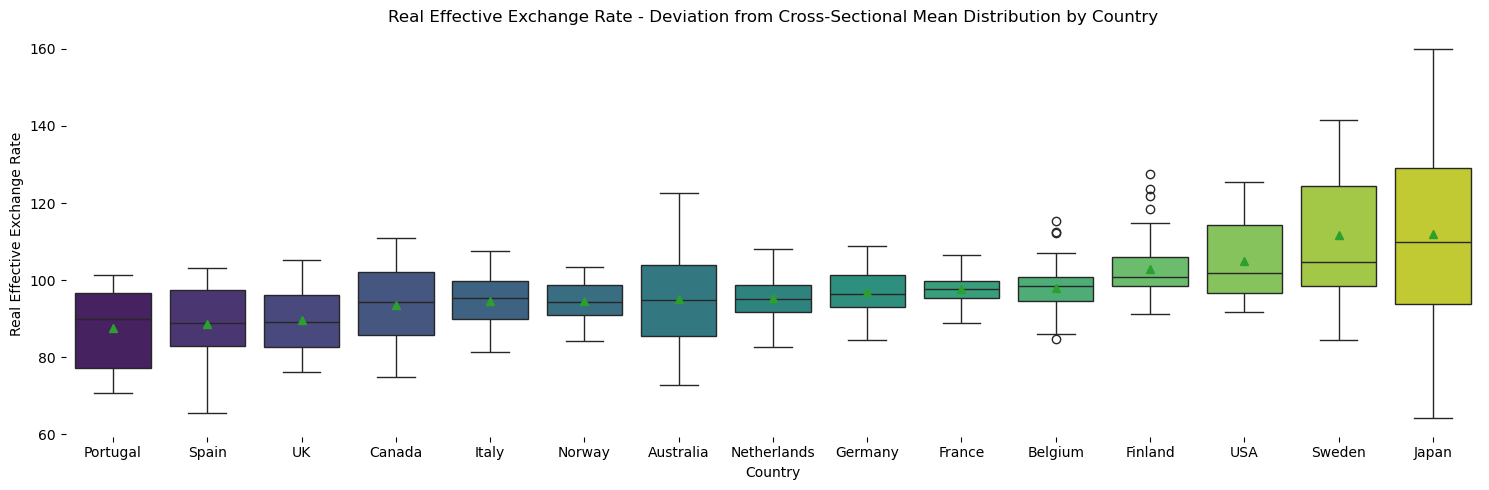

In [35]:
# Deviation from Cross-Sectional Mean Boxplot
# (!!!) the line is the median and not the mean

#/////////
# Plotting
#/////////
# Loop on variable (without country and time)
for var in plot_data.columns: 
# (!!!) nice way to exclude country (index not var)
    if var == "Country":
        continue
# (!!!) NaN cleaning
    df = plot_data.copy()
    df = df[["Country", var]]
# (!!!) Drop nan only for those columns (var) that result affected by missing values (NOT ALL) or we will lose observations also from healthy variables
    affected_var = [
        "Nominal Compensation Per Employee", 
        "Real Compensation Per Employee", 
        "Adjusted Labour Share", 
        "Unemployment Rate", 
        "Short-Term Unemployment",
        "Long-Term Unemployment",
        "Labor Force"
    ]
    if var in affected_var:
        df = df.dropna(subset=var)

# We apply again the mask
    wide = (
        df.pivot_table(index=df.index, columns="Country", values=var, aggfunc="mean")
        .sort_index()
    )
    mean_t = wide.mean(axis=1)          
    dev = wide.sub(mean_t, axis=0)     
    std_t = dev.std(axis=1)             
    df_dev = (
        dev.stack()
        .rename("dev_from_cs_mean")
        .reset_index()
        .rename(columns={"level_1": "Country"})
    )
# (!!!) We wanto to order countries by mean this time to be plugged in sns under the call "order"
    statistics = (
        df_dev.groupby("Country")["dev_from_cs_mean"]
        .agg(mean="mean", n="count")
        .dropna(subset=["mean"])
    )

    statistics = statistics[statistics["n"] >= 2]
    if statistics.empty:
        continue
# (!!!) This is essential cuz the order must be unique (no more than one country can be associated to the same index number)
    country_order = statistics.sort_values("mean").index
    country_order = pd.Index(country_order).unique().tolist()
# We define the palette following past graphs design
    pal = sns.color_palette("viridis", n_colors=len(country_order))

# Plot set-up
    fig, ax = plt.subplots(figsize=(15, 5))
    
    sns.boxplot(
        data=df,
        x="Country",
        y=var,
        order=country_order,
        showmeans=True,
        ax=ax,
        palette=pal
    )
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_title(f"{var} - Deviation from Cross-Sectional Mean Distribution by Country")
    ax.set_xlabel("Country")
    ax.set_ylabel(var)

    plt.tight_layout()
    plt.show()

##### <span style="color: dodgerblue"> **1.2) What is the largest number of period T for individuals? What is the number of individuals (countries)?** </span>

[no code, comment in the document]

##### <span style="color: dodgerblue"> **1.3) Comment on the structure of the unbalanced panel (how many (and which) countries have a single observation, discontinuities between observations, how many individuals have at least 2 consecutive observations (which is useful to compute lags, autocorrelations, first difference and within estimators)?** </span>

[no code, comment in the document]

##### <span style="color: dodgerblue"> **1.4) VARIABLE TRANSFORMATIONS PART 1: Compute between transformed and one-way-within transformed variables for all variables. Present a table with the the variance of the one-way-within-fixed-effects, between and pooled data for each variable. Compute the share of between and within variance in the total variance for each variable. Comment these results.** </span>

In [36]:
# Between Transformation 
# Key: the between transformation entails the computation of the overtime mean at the individual level for each numeric column. With this, we remove the time-variant dynamics to isolate the between-individuals variability (i). 

trans_df = raw_df.copy()

# (!!!) we are only interested in numeric cols
# (!!!) the command "columns" takes only the columns name and not the whole column (do not forget!)
numeric_cols = raw_df.select_dtypes(include="number").columns

trans_df[[f"{c}_between" for c in numeric_cols]] = (
    raw_df
    .groupby("country")[numeric_cols]
    .transform("mean")
)

trans_df

year    country          i      P          W         WR  \
0   1970-01-01  Australia   7.108333    9.1   6.413648  76.120158   
1   1971-01-01  Australia   7.008333    9.6   6.909308  77.071751   
2   1972-01-01  Australia   5.083333   10.2   7.284607  75.808223   
3   1973-01-01  Australia   6.983333   11.1   8.096658  74.465333   
4   1974-01-01  Australia  13.158333   12.9   9.688749  75.817692   
..         ...        ...        ...    ...        ...        ...   
745 2015-01-01        USA   0.226667  100.0  65.600000  62.655205   
746 2016-01-01        USA   0.644167  101.3  66.400000  62.819300   
747 2017-01-01        USA   1.152500  103.4  68.600000  63.695450   
748 2018-01-01        USA   2.188333  105.9  70.900000  64.279238   
749 2019-01-01        USA   2.207500  107.9  73.100000  65.093500   

              GDP    LS       PCOM        UN  ...  WR_between   GDP_between  \
0    2.835193e+05  59.7   2.113115  1.653364  ...   59.209667  6.611638e+05   
1    2.946057e+05  60.4   2.709369  1.907799  ...   59.209667  6.611638e+05   
2    3.023225e+05  60.3   2.925285  2.610752  ...   59.209667  6.611638e+05   
3    3.147389e+05  60.8   4.174010  2.309362  ...   59.209667  6.611638e+05   
4    3.189447e+05  66.9  13.802962  2.670259  ...   59.209667  6.611638e+05   
..            ...   ...        ...       ...  ...         ...           ...   
745  1.820602e+07  56.8  66.099106  5.279920  ...   48.940835  1.171694e+07   
746  1.850960e+07  56.8  56.023884  4.869110  ...   48.940835  1.171694e+07   
747  1.892457e+07  56.9  69.357989  4.355201  ...   48.940835  1.171694e+07   
748  1.948198e+07  56.8  89.358138  3.895676  ...   48.940835  1.171694e+07   
749  1.992897e+07  56.9  78.251714  3.669213  ...   48.940835  1.171694e+07   

     LS_between  PCOM_between  UN_between  SHORTUN_between  LONGUN_between  \
0        58.062     47.449644    6.250230       380.560828      253.481953   
1        58.062     47.449644    6.250230       380.560828      253.481953   
2        58.062     47.449644    6.250230       380.560828      253.481953   
3        58.062     47.449644    6.250230       380.560828      253.481953   
4        58.062     47.449644    6.250230       380.560828      253.481953   
..          ...           ...         ...              ...             ...   
745      59.682     47.449644    6.202492      6285.456600     1655.700000   
746      59.682     47.449644    6.202492      6285.456600     1655.700000   
747      59.682     47.449644    6.202492      6285.456600     1655.700000   
748      59.682     47.449644    6.202492      6285.456600     1655.700000   
749      59.682     47.449644    6.202492      6285.456600     1655.700000   

       LF_between  REER_between  SH_between  
0      9016.64966     95.102589    7.739117  
1      9016.64966     95.102589    7.739117  
2      9016.64966     95.102589    7.739117  
3      9016.64966     95.102589    7.739117  
4      9016.64966     95.102589    7.739117  
..            ...           ...         ...  
745  129297.66500    104.919930    4.988276  
746  129297.66500    104.919930    4.988276  
747  129297.66500    104.919930    4.988276  
748  129297.66500    104.919930    4.988276  
749  129297.66500    104.919930    4.988276  

[750 rows x 28 columns]

In [37]:
# One-way-within-FE Transformation 
# Key: the one-way-within transformation (demeaning) entails the computation of the difference between yit (actual value of y of i at time t) and the overtime mean at the individual level for each numeric column. 

# (!!!) we keep the reference to raw_data to avoid picking up the new columns just created from the between transformation
numeric_cols = raw_df.select_dtypes(include="number").columns

# (!!!) no need to groupby for raw_data[c] as it already cross matches with the mean of reference given the index 
for c in numeric_cols: 
    trans_df[f"{c}_within"] = raw_df[c] - raw_df.groupby("country")[c].transform("mean")

trans_df

year    country          i      P          W         WR  \
0   1970-01-01  Australia   7.108333    9.1   6.413648  76.120158   
1   1971-01-01  Australia   7.008333    9.6   6.909308  77.071751   
2   1972-01-01  Australia   5.083333   10.2   7.284607  75.808223   
3   1973-01-01  Australia   6.983333   11.1   8.096658  74.465333   
4   1974-01-01  Australia  13.158333   12.9   9.688749  75.817692   
..         ...        ...        ...    ...        ...        ...   
745 2015-01-01        USA   0.226667  100.0  65.600000  62.655205   
746 2016-01-01        USA   0.644167  101.3  66.400000  62.819300   
747 2017-01-01        USA   1.152500  103.4  68.600000  63.695450   
748 2018-01-01        USA   2.188333  105.9  70.900000  64.279238   
749 2019-01-01        USA   2.207500  107.9  73.100000  65.093500   

              GDP    LS       PCOM        UN  ...  WR_within    GDP_within  \
0    2.835193e+05  59.7   2.113115  1.653364  ...  16.910491 -3.776445e+05   
1    2.946057e+05  60.4   2.709369  1.907799  ...  17.862084 -3.665581e+05   
2    3.023225e+05  60.3   2.925285  2.610752  ...  16.598556 -3.588412e+05   
3    3.147389e+05  60.8   4.174010  2.309362  ...  15.255666 -3.464249e+05   
4    3.189447e+05  66.9  13.802962  2.670259  ...  16.608025 -3.422190e+05   
..            ...   ...        ...       ...  ...        ...           ...   
745  1.820602e+07  56.8  66.099106  5.279920  ...  13.714370  6.489088e+06   
746  1.850960e+07  56.8  56.023884  4.869110  ...  13.878465  6.792669e+06   
747  1.892457e+07  56.9  69.357989  4.355201  ...  14.754615  7.207639e+06   
748  1.948198e+07  56.8  89.358138  3.895676  ...  15.338404  7.765040e+06   
749  1.992897e+07  56.9  78.251714  3.669213  ...  16.152665  8.212038e+06   

     LS_within  PCOM_within  UN_within  SHORTUN_within  LONGUN_within  \
0        1.638   -45.336529  -4.596866             NaN            NaN   
1        2.338   -44.740274  -4.342431             NaN            NaN   
2        2.238   -44.524359  -3.639478             NaN            NaN   
3        2.738   -43.275634  -3.940869             NaN            NaN   
4        8.838   -33.646681  -3.579972             NaN            NaN   
..         ...          ...        ...             ...            ...   
745     -2.882    18.649462  -0.922572       -317.1236          672.3   
746     -2.882     8.574240  -1.333382       -539.4566          349.3   
747     -2.782    21.908346  -1.847291       -991.2066           32.3   
748     -2.882    41.908495  -2.306816      -1320.5396         -306.7   
749     -2.782    30.802070  -2.533280      -1551.8736         -388.7   

       LF_within  REER_within  SH_within  
0    -3538.42466    -1.197865  -0.630783  
1    -3393.67766     1.927743  -0.730783  
2    -3266.39166     3.140684  -2.655783  
3    -3116.75066    14.883284  -0.755783  
4    -2963.86566    15.983610   5.419217  
..           ...          ...        ...  
745  27832.23500    10.296044  -6.130979  
746  29889.53500    13.748199  -4.525864  
747  31022.13500    13.405089  -4.031867  
748  32777.33500    12.166410  -3.047915  
749  34241.03500    15.404914  -2.870314  

[750 rows x 41 columns]

In [38]:
# Variance Analysis

#____________________________________________________________________________________
# Pooled data Variance 
# Var_pooled = Var(x_it)
# (!!!) if balanced Var(x_it) = Var_between + Var_within = Var(x_i.) + Var(x_it - x_i.)
# (!!!) add variance equality demonstration in the document
#____________________________________________________________________________________
# Between Variance 
# Var_between = Var(x_i.)
#____________________________________________________________________________________
# One-way-within Variance
# Var_within = Var(x_it - x_i.)
#____________________________________________________________________________________ 

df = raw_df.copy().rename(columns=labels_mapper)
numeric_cols = df.select_dtypes(include="number").columns

rows = []
for var in numeric_cols:

# 1) Pooled Variance 
    x_it = df[var]
    var_pooled = df[var].var(ddof=0)

# 2) Between Variance
    x_i = df.groupby("Country")[var].transform("mean")
    x_between = x_i
    var_between = x_between.var(ddof=0)

# 3) Within Variance (one-way FE demeaned)
    x_i = df.groupby("Country")[var].transform("mean")
    x_within = x_it - x_i
    var_within = x_within.var(ddof=0)

# Variance shares (guard against zero pooled var)
# if balanced Var(x_it) = Var_between + Var_within = Var(x_i.) + Var(x_it - x_i.)
    var_share_between = var_between / var_pooled
    var_share_within = var_within / var_pooled

    rows.append({
        "Variable": var,
        "Pooled Variance (x_it)": var_pooled,
        "Between Variance (x_i.)": var_between,
        "Within Variance (x_it - x_i.)": var_within,
        "Variance Share - Between": var_share_between,
        "Variance Share - Within": var_share_within
    })

var_table = pd.DataFrame(rows).set_index("Variable")
var_table

Pooled Variance (x_it)  \
Variable                                                    
Short-Term Interest Rate                     2.345647e+01   
GDP Deflator                                 8.711802e+02   
Nominal Compensation Per Employee            2.632974e+02   
Real Compensation Per Employee               3.950393e+02   
Real Gross Domestic Product                  9.525583e+12   
Adjusted Labour Share                        2.928480e+01   
Energy Commodities Price Index               1.346645e+03   
Unemployment Rate                            1.567308e+01   
Short-Term Unemployment                      2.835408e+06   
Long-Term Unemployment                       7.764797e+05   
Labor Force                                  1.082883e+09   
Real Effective Exchange Rate                 1.644695e+02   
Shadow Interest Rate                         3.070650e+01   

                                   Between Variance (x_i.)  \
Variable                                                     
Short-Term Interest Rate                      1.711280e+00   
GDP Deflator                                  5.136753e+01   
Nominal Compensation Per Employee             1.603596e+01   
Real Compensation Per Employee                8.661118e+01   
Real Gross Domestic Product                   7.966062e+12   
Adjusted Labour Share                         1.126419e+01   
Energy Commodities Price Index                6.911684e-26   
Unemployment Rate                             6.969757e+00   
Short-Term Unemployment                       2.201437e+06   
Long-Term Unemployment                        5.067822e+05   
Labor Force                                   1.028085e+09   
Real Effective Exchange Rate                  5.167044e+01   
Shadow Interest Rate                          2.041590e+00   

                                   Within Variance (x_it - x_i.)  \
Variable                                                           
Short-Term Interest Rate                            2.174519e+01   
GDP Deflator                                        8.198127e+02   
Nominal Compensation Per Employee                   2.470830e+02   
Real Compensation Per Employee                      3.121126e+02   
Real Gross Domestic Product                         1.559521e+12   
Adjusted Labour Share                               1.802729e+01   
Energy Commodities Price Index                      1.346645e+03   
Unemployment Rate                                   8.624334e+00   
Short-Term Unemployment                             1.527830e+05   
Long-Term Unemployment                              2.841602e+05   
Labor Force                                         4.655657e+07   
Real Effective Exchange Rate                        1.127991e+02   
Shadow Interest Rate                                2.866491e+01   

                                   Variance Share - Between  \
Variable                                                      
Short-Term Interest Rate                       7.295557e-02   
GDP Deflator                                   5.896315e-02   
Nominal Compensation Per Employee              6.090436e-02   
Real Compensation Per Employee                 2.192470e-01   
Real Gross Domestic Product                    8.362808e-01   
Adjusted Labour Share                          3.846428e-01   
Energy Commodities Price Index                 5.132521e-29   
Unemployment Rate                              4.446960e-01   
Short-Term Unemployment                        7.764094e-01   
Long-Term Unemployment                         6.526664e-01   
Labor Force                                    9.493966e-01   
Real Effective Exchange Rate                   3.141643e-01   
Shadow Interest Rate                           6.648721e-02   

                                   Variance Share - Within  
Variable                                                    
Short-Term Interest Rate                          0.927044  
GDP Deflator                          

In [39]:
# 3D Variance Surface Plotting

# Target variable
# (!!!) In this case we go for the Unemployment Rate given its interesting balanced share ration between within and between variance
var = var_table.index[7]

#////////////////
# Axis Definition
#////////////////

# Variance call 
pooled  = float(var_table.loc[var, "Pooled Variance (x_it)"])
between = float(var_table.loc[var, "Between Variance (x_i.)"])
within  = float(var_table.loc[var, "Within Variance (x_it - x_i.)"])
# Normalized shares (geometry-safe)
between_share = float(var_table.loc[var, "Variance Share - Between"])
within_share  = float(var_table.loc[var, "Variance Share - Within"])
# Grid set-up for the surface design
n = 80
x = np.linspace(0, within, n)
y = np.linspace(0, between, n)
X, Y = np.meshgrid(x, y)
# Pooled variance surface (plane suface and wave with + 0.05)
Z = pooled * (X / within * within_share + Y / between * between_share)
# (!!!) Cos and Sin for the curvature
Z += 0.05 * pooled * np.sin(2*np.pi*X/within) * np.cos(2*np.pi*Y/between)

#/////////
# Plotting
#/////////
fig = go.Figure(go.Surface(
    x=X,
    y=Y,
    z=Z,
    colorscale="Viridis",
    showscale=True,
))
fig.update_layout(
    title=f"3D Variance Decomposition — {var}",
    scene=dict(
        xaxis=dict(title="Within variance"),
        yaxis=dict(title="Between variance"),
        zaxis=dict(title="Pooled variance"),
        aspectmode="cube",
    ),
    margin=dict(l=0, r=0, b=0, t=60),
)

fig.show()

##### <span style="color: dodgerblue"> **1.5) Plot the distribution of the one-way-fixed-effects-within x(it)-x(i.) and between (x(i.)) transformed dependent variable and of you key (preferred) explanatory variable (not all the explanatory variable) plotting on the same graph an histogram, a normal law with same empirical mean and standard error and a kernel continuous approximation. Comment the between and within difference for each variable, and compare within/within for dependent and explanatory variable, and between/between for dependent and explanatory variable: kurtosis, skewness, non-normality, high leverage observation (far from the mean), several modes (mixture of distribution)?** </span>

In [40]:
# Data Plotting (variable distribution with respect to the theoretical normal)
# General Layout (column and rows enumeration, figure's size, sub_plot)
# (!!!) For defining the preferred explanatory/dependent variables, we refer to the paper's model 1, which includes in the state vector the following variables:
# target variables = PCOM, GDP, UN, P, WR, LS, i

# //////
# Set-up
# //////

# Target/preferred variables
df = trans_df.copy()
target_variables = ["GDP", "UN", "P", "WR", "LS", "i"]
# Color Palette
COLOR_BETWEEN = "#440154"   
COLOR_WITHIN  = "#E16207" 
# Figure set-up
cols = 3
rows = (len(target_variables) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = np.array(axes).flatten()

#////////
# Overlay
#////////

def overlay_one(ax, data, label, color, bins=30):
    data = np.asarray(data.dropna())
    n = len(data)
    if n < 5:
        return
    mu = data.mean()
    sd = data.std(ddof=1)
# Data distribution via histogram
    sns.histplot(
        data,
        bins=bins,
        stat="density",
        alpha=0.25,
        color=color,
        ax=ax,
        label=f"{label} hist"
    )
# Kernel density via KDE curve
    sns.kdeplot(
        data,
        ax=ax,
        color=color,
        linewidth=2,
        label=f"{label} KDE"
    )
# Normal curve (μ, σ)
# (!!!) With the same empirical mean and variance
    xmin, xmax = ax.get_xlim()
# (!!!) Random guess between xmin and xmax (200 trials)
    x = np.linspace(xmin, xmax, 200)
    ax.plot(
        x,
        norm.pdf(x, mu, sd),
        linestyle="--",
        linewidth=2,
        color=color,
        label=f"{label} Normal(μ,σ)"
    )

#/////////
# Plotting
# ////////

# we iterate over i (just the axis) and target variables
for i, var in enumerate(target_variables):
    ax = axes[i]
    within_col = f"{var}_within"
    between_col = f"{var}_between"

# Between Distribution
# (!!!) overlay_one function call
    overlay_one(ax, df[between_col], f"{var}_between", COLOR_BETWEEN)
# Within Distribution 
    overlay_one(ax, df[within_col], f"{var}_within", COLOR_WITHIN)
# Graph setttings
    ax.set_title(f"{var} - Within vs Between")
    ax.grid(alpha=0.2)
    ax.legend(fontsize=8)

# /////////
# Cosmetics
# /////////

# Manual deletion of unused panels
for j in range(len(target_variables), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Within and Between Distributions\nHistogram, KDE and Normal Approximation")

plt.tight_layout()
plt.show()

In [41]:
# General outlook on descriptive statistic of within and between transformed preferred (target) variables
# Count, mean, std, min, max, intra-quartiles (25th, 50th, 75th) + Skewness, Kurtosis
# We also traspose the original dataset to highlight comparability of same-class statistics among variables

target_variables = [
    "GDP_between", "UN_between", "P_between", "WR_between", "LS_between", "i_between",
    "GDP_within", "UN_within", "P_within", "WR_within", "LS_within", "i_within"
]

df = trans_df[target_variables]                
desc_df = df.describe().T                         

desc_df["skewness"] = df.skew()                    
desc_df["kurtosis"] = df.kurtosis()                

desc_df

count          mean           std           min            25%  \
GDP_between  750.0  1.941396e+06  2.824305e+06  1.674476e+05  322011.908440   
UN_between   750.0  7.088013e+00  2.641791e+00  3.083232e+00       6.152113   
P_between    750.0  6.434373e+01  7.171897e+00  5.450400e+01      58.646000   
WR_between   750.0  4.898961e+01  9.312723e+00  3.016226e+01      42.628208   
LS_between   750.0  5.839143e+01  3.358456e+00  5.016000e+01      57.124000   
i_between    750.0  6.186977e+00  1.309032e+00  3.481471e+00       5.288750   
GDP_within   750.0  3.973643e-11  1.249641e+06 -6.530101e+06 -199425.742930   
UN_within    741.0  3.835588e-17  2.938705e+00 -1.323700e+01      -1.580318   
P_within     750.0  3.031649e-16  2.865148e+01 -5.384600e+01     -22.894000   
WR_within    740.0  1.305862e-15  1.767866e+01 -3.434230e+01      -8.378310   
LS_within    740.0  2.131628e-15  4.248727e+00 -1.069000e+01      -2.882500   
i_within     750.0  3.789561e-17  4.666286e+00 -8.394420e+00      -3.539999   

                      50%           75%           max  skewness   kurtosis  
GDP_between  1.047213e+06  1.993680e+06  1.171694e+07  2.713909   6.713787  
UN_between   6.575082e+00  7.921944e+00  1.476560e+01  1.233022   2.491660  
P_between    6.444200e+01  6.730400e+01  8.534600e+01  1.376696   2.400780  
WR_between   4.894083e+01  5.678830e+01  6.467669e+01 -0.018137  -0.647404  
LS_between   5.958400e+01  6.160200e+01  6.205800e+01 -1.195510   0.677392  
i_between    6.111655e+00  7.426312e+00  8.038087e+00 -0.384371  -0.847142  
GDP_within  -1.037962e+04  2.367219e+05  8.212038e+06  0.555017  15.892677  
UN_within   -1.103573e-01  1.646378e+00  1.132812e+01 -0.182776   2.657618  
P_within     5.422000e+00  2.262300e+01  4.989200e+01 -0.284871  -1.046338  
WR_within   -2.144614e+00  6.009849e+00  1.301895e+02  2.965889  16.695920  
LS_within   -4.530000e-01  2.339000e+00  2.671000e+01  1.076008   3.869769  
i_within    -6.655017e-01  3.494855e+00  1.686191e+01  0.455426  -0.376969

In [42]:
# Extreme observations analysis: high leverage observations - BETWEEN
# Percentiles mask for each variable 
# (!!!) The mask is a boolean that turns True when the value falls in the top 90% or bottom 10% tier of observations 
# (!!!) Like as expected for the GDP is mainly Japan and US located way far from the average (n is also very low in this case, 15)

# Set up for teh df construction with target variables and only unique values
target_variables = [
    "GDP_between", "UN_between", "P_between",
    "WR_between", "LS_between", "i_between"
]
unique_df = {
    var: pd.Series(trans_df[var].dropna().unique())
    for var in target_variables
}
unique_df = pd.DataFrame(unique_df)

# Outliers (90th and 10th percentile off)
outlier_df = pd.DataFrame()
for var in target_variables:
    q10 = unique_df[var].quantile(0.10)
    q90 = unique_df[var].quantile(0.90)
    outlier_df[var] = (unique_df[var][(unique_df[var] <= q10) | (unique_df[var] >= q90)].reset_index(drop=True))

outlier_df

GDP_between  UN_between  P_between  WR_between  LS_between  i_between
0  1.674476e+05    9.349016     57.008   38.671163     61.7975   7.739117
1  3.944491e+06    3.083232     70.654   64.676690     62.0580   4.546587
2  2.078842e+05    3.291589     85.346   30.162262     51.8580   3.481471
3  1.171694e+07   14.765596     54.504   63.423602     50.1600   8.038087

In [43]:
# Extreme observations analysis: high leverage observations - WITHIN
# Percentiles mask for each variable 
# (!!!) The mask is a boolean that turns True when the value falls in the top 98% or bottom 02% tier of observations 
# (!!!) Increased threasholds as N increases
# (!!!) Look at the sign (we have also negatives here)

# Set up for teh df construction with target variables and only unique values
target_variables = [
    "GDP_within", "UN_within", "P_within",
    "WR_within", "LS_within", "i_within"
]
unique_df = {
    var: pd.Series(trans_df[var].dropna().unique())
    for var in target_variables
}
unique_df = pd.DataFrame(unique_df)

# Outliers (95th and 5th percentile off)
outlier_df = pd.DataFrame()
for var in target_variables:
    q02 = unique_df[var].quantile(0.02)
    q98 = unique_df[var].quantile(0.98)
    outlier_df[var] = (unique_df[var][(unique_df[var] <= q02) | (unique_df[var] >= q98)].reset_index(drop=True))

outlier_df

GDP_within  UN_within  P_within   WR_within  LS_within   i_within
0  -6.530101e+06  -6.494834    46.292   58.144768      9.856   9.872550
1  -6.359281e+06  -6.561438    48.192   68.398657      9.376  12.263970
2  -6.077526e+06  -6.054839    49.892   68.841985     -7.758   9.879097
3  -5.759141e+06   9.040722   -53.052   69.562939     -8.658  11.676113
4  -5.791346e+06   9.243281   -52.252   60.436485     -7.358  12.276113
5  -5.803521e+06   8.064190   -52.704   54.767192     11.510  10.676113
6  -5.484898e+06   7.248562   -52.946  101.460560     10.410  -7.643253
7  -5.196719e+06   7.962032   -52.646   93.662974      9.810  -7.887578
8  -4.835805e+06   8.619743   -52.346   77.584425      9.510  -7.952937
9  -4.617938e+06 -13.237004   -53.846  122.760797     17.010  -7.945978
10 -4.636165e+06 -12.758539    46.150  128.087902     26.710  -7.980220
11 -4.456475e+06 -11.733183    48.550  130.189486     25.310  11.031029
12 -4.587373e+06 -12.018301   -52.804  117.884812     19.310  10.488580
13 -4.260560e+06 -11.516606   -52.604   77.196222     13.610  14.675247
14 -3.720969e+06 -10.071994   -52.404   51.488578     -7.690  16.861913
15  3.883309e+06 -10.170092   -52.104  -30.735233     -8.090  14.355247
16  4.317434e+06  -9.535954    45.496  -32.215588     -9.090  -7.817420
17  4.639806e+06  -7.763702    46.096  -34.342303    -10.190  -7.828153
18  4.659792e+06  -6.053686    47.496  -32.760662    -10.690  -8.057453
19  4.234015e+06   6.836728    48.496  -32.264845    -10.390  -8.301778
20  4.666104e+06   8.010832    48.796  -32.349809     -9.590  -8.367137
21  4.920024e+06   9.405833   -52.268  -32.409427     -8.990  -8.360178
22  5.299461e+06   8.198480    46.432  -32.082990     -7.172  -8.394420
23  5.612882e+06   7.383895    47.132  -31.470447      9.552  13.564547
24  6.009349e+06  -6.313375   -53.776  -31.682879        NaN   9.965297
25  6.489088e+06  -6.533410   -52.776  -31.865153        NaN  12.245297
26  6.792669e+06  10.022136   -51.976  -31.884631        NaN  -7.536587
27  7.207639e+06  11.328121    45.746  -32.020842        NaN  -7.529628
28  7.765040e+06   9.676119    47.546  -30.907990        NaN  -7.563870
29  8.212038e+06   7.292160    45.654  -30.295118        NaN  10.622083

In [44]:
# Normality Test (Jarque Bera Test) for Within and Between Transformed Data
# H0: Data follow a normal distribution 
# The larger the JB stat, the more the distribution deviates from the normal. The smaller the p-value the greater is the confidence of statistically significant results.
# Default empty dataset, with 3 columns per each cluster of observations
# (!!!) We run the normality test on aggregate data, as it is economically and statistically meaningless to test normality country-by-country
# (!!!) We need to drop NaN otherwise the test loop crashes
df = trans_df.copy().dropna()
target_variables = [
    "GDP_within", "UN_within", "P_within",
    "WR_within", "LS_within", "i_within", 
    "GDP_between", "UN_between", "P_between",
    "WR_between", "LS_between", "i_between"
]
jb_df = pd.DataFrame(columns=["Jarque Bera Stat", "p-value", "Statistical Significance"])

# We loop over each variable to extract its respective JB stat and p-value, to then concatenate each single test results set in an aggregate dataset 
for var in target_variables:
# JB test deployment
    jb_stat = stats.jarque_bera(df[var])[0]
    jb_pvalue = stats.jarque_bera(df[var])[1]

# We add a column ("Statistical Significance") to better visualize the statistical significance confidence thresholds for each variable's JB-stat
    jb_significance = significance_stars(jb_pvalue)

    jb_df = pd.concat(
        [jb_df, pd.DataFrame({"Jarque Bera Stat": [jb_stat], 
                                "p-value": [jb_pvalue], 
                                "Statistical Significance": [jb_significance]})], 
                                ignore_index=True
    )

# Index renaiming with variables full name
jb_df.index = target_variables

print("Jarque Bera Test of Normality for Between and Within Transformed Target Variables (Model 1)")
jb_df

Jarque Bera Test of Normality for Between and Within Transformed Target Variables (Model 1)


Jarque Bera Stat        p-value Statistical Significance
GDP_within        4511.798619   0.000000e+00                      ***
UN_within          117.929832   2.465258e-26                      ***
P_within            27.971621   8.434120e-07                      ***
WR_within           37.122681   8.687851e-09                      ***
LS_within           13.041449   1.472602e-03                       **
i_within            36.365799   1.268432e-08                      ***
GDP_between       1104.870145  1.203639e-240                      ***
UN_between         414.772786   8.574997e-91                      ***
P_between          319.553928   4.071422e-70                      ***
WR_between           7.127801   2.832811e-02                        *
LS_between         191.333468   2.834427e-42                      ***
i_between           23.036308   9.947853e-06                      ***

In [45]:
# Distributional Equivalence Test (Kolomogorv-Smirnov Test) applied on Normal PDF comparison
# H0: The two samples are drawn from the same distribution
# or in case of comparison with normal PDF -> H0: Sample comes from a normal distribution
# The larger the KS stat, the stronger the evidence that the target samples do not come from the same distributions. Or alternatively, in the case of comparison with the theoretical normal, KS again measure the deviation magnitude pf the sample from the normal PDF. 
# Default empty dataset
df = trans_df.copy().dropna()
target_variables = [
    "GDP_within", "UN_within", "P_within",
    "WR_within", "LS_within", "i_within", 
    "GDP_between", "UN_between", "P_between",
    "WR_between", "LS_between", "i_between"
]
ks_df = pd.DataFrame(columns=["KS Stat (reference = Normal PDF)", "p-value", "Statistical Significance"])

# We loop over each variable to extract its respective KS stat and p-value, to then also compare the distribution with the Normal, as double-check to JB for non-normal distributions
for var in target_variables:

# Kolomogorv-Smirnov Test deployment (reference = Normal PDF)
    ks_stat = kstest(df[var], "norm", args=(df[var].mean(), df[var].std()))[0]
    ks_pvalue = kstest(df[var], "norm", args=(df[var].mean(), df[var].std()))[1]

# We add a column ("Statistical Significance") to better visualize the statistical significance confidence thresholds for each variable's KS-stat
    ks_significance = significance_stars(ks_pvalue)
    
    ks_df = pd.concat(
        [ks_df, pd.DataFrame({"KS Stat (reference = Normal PDF)": [ks_stat], 
                              "p-value": [ks_pvalue], 
                              "Statistical Significance": [ks_significance]})],
        ignore_index=True
    )

# Index renaiming with variables full name
ks_df.index = target_variables

print("Kolomogorv-Smirnov Test of Distributional Equivalence (Between/Within Transformed Target Variables - Normal PDF)")
ks_df

Kolomogorv-Smirnov Test of Distributional Equivalence (Between/Within Transformed Target Variables - Normal PDF)


KS Stat (reference = Normal PDF)       p-value  \
GDP_within                           0.258128  7.272547e-35   
UN_within                            0.052627  7.552693e-02   
P_within                             0.061567  2.271069e-02   
WR_within                            0.056084  4.853046e-02   
LS_within                            0.034893  4.641943e-01   
i_within                             0.087198  2.553531e-04   
GDP_between                          0.304611  1.141881e-48   
UN_between                           0.182396  1.669333e-17   
P_between                            0.216419  1.561126e-24   
WR_between                           0.125107  1.935159e-08   
LS_between                           0.197512  1.789782e-20   
i_between                            0.123611  3.002535e-08   

            Statistical Significance  
GDP_within                       ***  
UN_within                             
P_within                           *  
WR_within                          *  
LS_within                             
i_within                         ***  
GDP_between                      ***  
UN_between                       ***  
P_between                        ***  
WR_between                       ***  
LS_between                       ***  
i_between                        ***

##### <span style="color: dodgerblue"> **1.6) FD. FIRST DIFFERENCE VARIABLE TRANSFORMATIONS: Compute the first-differences x(i,t)-x(i,t-1) for panel data. Check for the first 3 changes of individuals (for data sorted by individual and then time) in say 3T+1 first observations that when there is a change of individual in the stacked vector individuals x time, the first differences is a dot for “not available”. In other words, for first-differences for panel data, check that when you change individual, the first observation is missing with a dot, and it is not the difference of the first observation of the second individual minus the last observation of the first individual, for example.** </span>

In [46]:
# First Difference Transformation 
# Key: x_it - x_it-1, generally good to remove time trends, but keep it mind there might be underlying time trends on periodical (lag=1) observations

# (!!!) we keep the reference to raw_data to avoid picking up transformed columns
df = raw_df.copy()
numeric_cols = df.select_dtypes(include="number").columns

# (!!!) no need to groupby for raw_data[c] as it already cross matches with the mean of reference given the index
# (!!!) no need to substitute missing values with ".", as the function .groupby() takes only observations from the same "country" 
# (!!!) command diff() quite nice and 1st observation per country = NaN holds true
for c in numeric_cols: 
    df[f"{c}_1diff"] = (df.groupby("country")[c].diff())

trans_diff_df = df.copy()
trans_diff_df

year    country          i      P          W         WR  \
0   1970-01-01  Australia   7.108333    9.1   6.413648  76.120158   
1   1971-01-01  Australia   7.008333    9.6   6.909308  77.071751   
2   1972-01-01  Australia   5.083333   10.2   7.284607  75.808223   
3   1973-01-01  Australia   6.983333   11.1   8.096658  74.465333   
4   1974-01-01  Australia  13.158333   12.9   9.688749  75.817692   
..         ...        ...        ...    ...        ...        ...   
745 2015-01-01        USA   0.226667  100.0  65.600000  62.655205   
746 2016-01-01        USA   0.644167  101.3  66.400000  62.819300   
747 2017-01-01        USA   1.152500  103.4  68.600000  63.695450   
748 2018-01-01        USA   2.188333  105.9  70.900000  64.279238   
749 2019-01-01        USA   2.207500  107.9  73.100000  65.093500   

              GDP    LS       PCOM        UN  ...  WR_1diff   GDP_1diff  \
0    2.835193e+05  59.7   2.113115  1.653364  ...       NaN         NaN   
1    2.946057e+05  60.4   2.709369  1.907799  ...  0.951593   11086.411   
2    3.023225e+05  60.3   2.925285  2.610752  ... -1.263527    7716.832   
3    3.147389e+05  60.8   4.174010  2.309362  ... -1.342890   12416.305   
4    3.189447e+05  66.9  13.802962  2.670259  ...  1.352359    4205.887   
..            ...   ...        ...       ...  ...       ...         ...   
745  1.820602e+07  56.8  66.099106  5.279920  ...  1.035147  479738.889   
746  1.850960e+07  56.8  56.023884  4.869110  ...  0.164095  303581.069   
747  1.892457e+07  56.9  69.357989  4.355201  ...  0.876150  414969.888   
748  1.948198e+07  56.8  89.358138  3.895676  ...  0.583788  557401.598   
749  1.992897e+07  56.9  78.251714  3.669213  ...  0.814261  446997.917   

     LS_1diff  PCOM_1diff  UN_1diff  SHORTUN_1diff  LONGUN_1diff  LF_1diff  \
0         NaN         NaN       NaN            NaN           NaN       NaN   
1         0.7    0.596255  0.254435            NaN           NaN   144.747   
2        -0.1    0.215916  0.702953            NaN           NaN   127.286   
3         0.5    1.248725 -0.301391            NaN           NaN   149.641   
4         6.1    9.628952  0.360897            NaN           NaN   152.885   
..        ...         ...       ...            ...           ...       ...   
745       0.6  -54.303252 -0.887542       -429.084        -891.0  1208.100   
746       0.0  -10.075222 -0.410810       -222.333        -323.0  2057.300   
747       0.1   13.334106 -0.513909       -451.750        -317.0  1132.600   
748      -0.1   20.000149 -0.459525       -329.333        -339.0  1755.200   
749       0.1  -11.106424 -0.226463       -231.334         -82.0  1463.700   

     REER_1diff  SH_1diff  
0           NaN       NaN  
1      3.125608 -0.100000  
2      1.212941 -1.925000  
3     11.742600  1.900000  
4      1.100326  6.175000  
..          ...       ...  
745   13.865398  1.593464  
746    3.452155  1.605116  
747   -0.343109  0.493997  
748   -1.238679  0.983952  
749    3.238504  0.177600  

[750 rows x 28 columns]

##### <span style="color: dodgerblue"> **1.7) First differences distributions. Plot the distributions (histogram, KDE, normal law with same mean and standard error) for first difference dependent GDPG and first difference explanatory EDA/GDP for each of these two transformations.** </span>

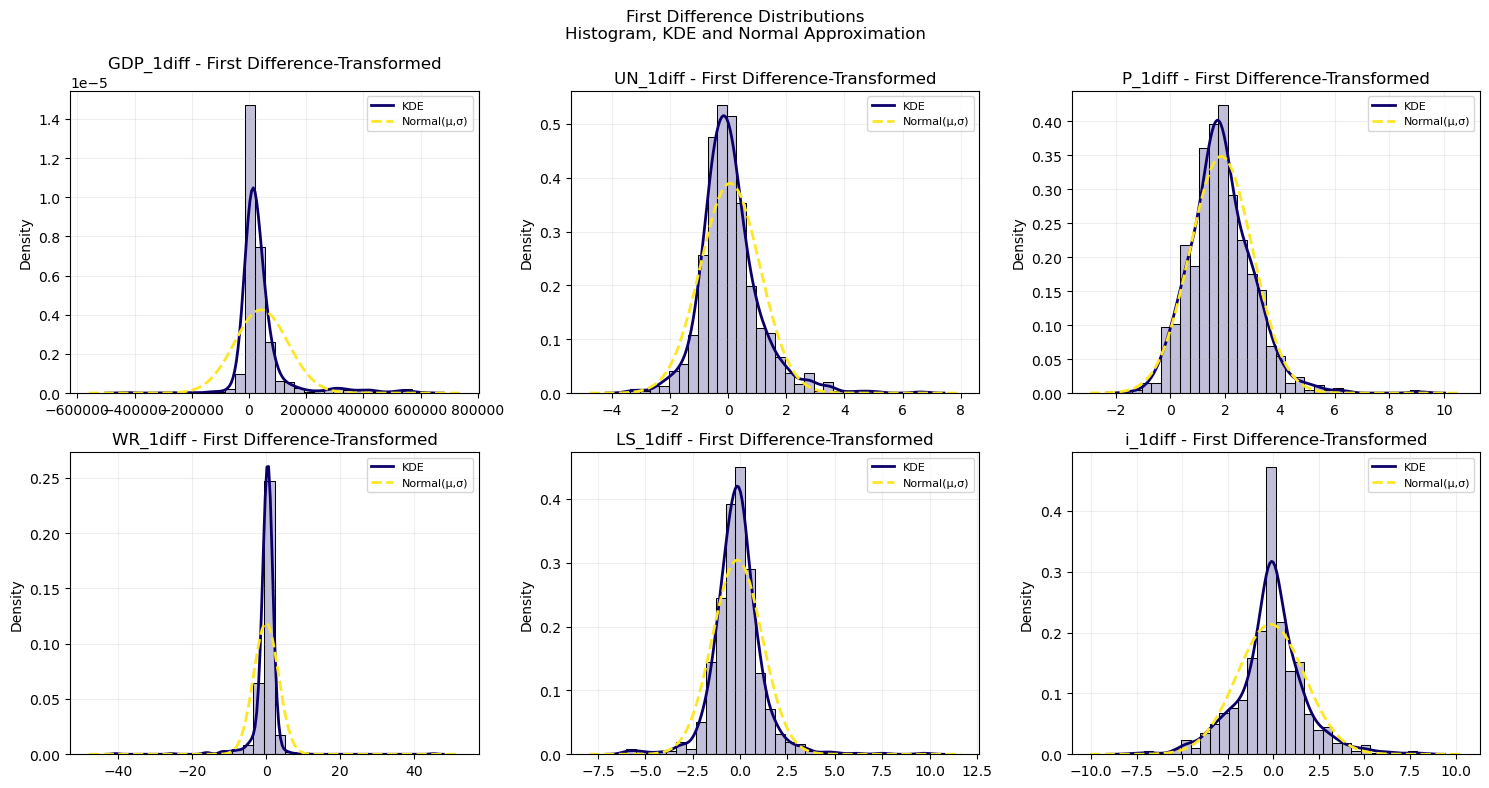

In [47]:
# Data Plotting (1st difference-transformed variable distribution with respect to the theoretical normal)
# General Layout (column and rows enumeration, figure's size, sub_plot)

# //////
# Set-up
# //////

# Target/preferred variables
# (!!!) I made the mistake of using trans_df instead of trans_diff_df 5 times I guess 
df = trans_diff_df.copy()
target_variables = ["GDP_1diff", "UN_1diff", "P_1diff", "WR_1diff", "LS_1diff", "i_1diff"]  

# Figure set-up
cols = 3
rows = (len(target_variables) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = np.array(axes).flatten()

#////////
# Overlay
#////////

def overlay_one(ax, data, label, bins=30):
    data = np.asarray(data.dropna())
    n = len(data)
    if n < 5:
        return
    mu = data.mean()
    sd = data.std(ddof=1)
# Data distribution via histogram
    sns.histplot(
        data,
        bins=bins,
        stat="density",
        alpha=0.25,
        color="#0B006A",
        ax=ax
    )
# Kernel density via KDE curve
    sns.kdeplot(
        data,
        ax=ax,
        color="#0B006A",
        linewidth=2,
        label="KDE"
    )
# Normal curve (μ, σ)
# (!!!) With the same empirical mean and variance
    xmin, xmax = ax.get_xlim()
# (!!!) Random guess between xmin and xmax (200 trials)
    x = np.linspace(xmin, xmax, 200)
    ax.plot(
        x,
        norm.pdf(x, mu, sd),
        linestyle="--",
        linewidth=2,
        color="#FDE725",
        label="Normal(μ,σ)"
    )

#/////////
# Plotting
# ////////

# we iterate over i (just the axis) and target variables
for i, var in enumerate(target_variables):
    ax = axes[i]

# Between Distribution
# (!!!) overlay_one function call
    overlay_one(ax, df[var], var)

# Graph setttings
    ax.set_title(f"{var} - First Difference-Transformed")
    ax.grid(alpha=0.2)
    ax.legend(fontsize=8)

# /////////
# Cosmetics
# /////////

# Manual deletion of unused panels
for j in range(len(target_variables), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("First Difference Distributions\nHistogram, KDE and Normal Approximation")

plt.tight_layout()
plt.show()

In [48]:
# Normality Test (Jarque Bera Test) for First Difference Transformed Data
# H0: Data follow a normal distribution 
# The larger the JB stat, the more the distribution deviates from the normal. The smaller the p-value the greater is the confidence of statistically significant results.
# Default empty dataset, with 3 columns per each cluster of observations
df = trans_diff_df.copy().dropna()
target_variables = [
    "GDP_1diff", "UN_1diff", "P_1diff",
    "WR_1diff", "LS_1diff", "i_1diff", 
]
jb_diff_df = pd.DataFrame(columns=["Jarque Bera Stat", "p-value", "Statistical Significance"])

# We loop over each variable to extract its respective JB stat and p-value, to then concatenate each single test results set in an aggregate dataset 
for var in target_variables:
# JB test deployment
    jb_diff_stat = stats.jarque_bera(df[var])[0]
    jb_diff_pvalue = stats.jarque_bera(df[var])[1]

# We add a column ("Statistical Significance") to better visualize the statistical significance confidence thresholds for each variable's JB-stat
    jb_diff_significance = significance_stars(jb_pvalue)

    jb_diff_df = pd.concat(
        [jb_diff_df, pd.DataFrame({"Jarque Bera Stat": [jb_diff_stat], 
                                "p-value": [jb_diff_pvalue], 
                                "Statistical Significance": [jb_diff_significance]})], 
                                ignore_index=True
    )

# Index renaiming with variables full name
jb_diff_df.index = target_variables

print("Jarque Bera Test of Normality for First Difference Transformed Target Variables (Model 1)")
jb_diff_df

Jarque Bera Test of Normality for First Difference Transformed Target Variables (Model 1)


Jarque Bera Stat        p-value Statistical Significance
GDP_1diff       3011.514795   0.000000e+00                      ***
UN_1diff        1087.342608  7.701100e-237                      ***
P_1diff           33.870383   4.417126e-08                      ***
WR_1diff          95.673881   1.677570e-21                      ***
LS_1diff         270.722692   1.634234e-59                      ***
i_1diff           70.209336   5.678535e-16                      ***

##### <span style="color: dodgerblue"> **1.8) First differences simple correlation. For these FD transformed variables, plot the bivariate cloud of points with regression line and on top the marginal distribution of the horizontal axis and on right hand side the marginal distribution of the variable on the vertical axis. Compare with one-way-fixed effects and between distributions. Report the simple correlation coefficient on the graph.** </span>

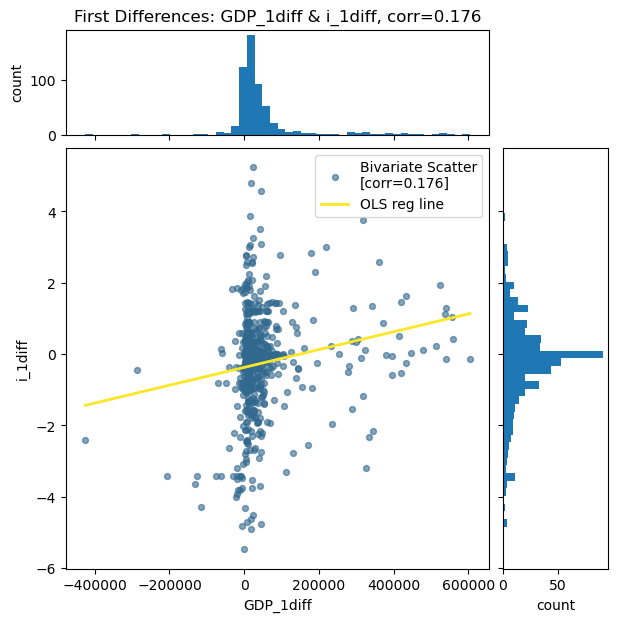

In [70]:
# Bivariate Cloud of Points Plotting for First Difference - Transformed Variables 
# Target Variables: GDP (Real Gross Domestic Product) and i (Short-Term Interest Rate)
# (!!!) We have a state space vector as we are working with VAR and not two single defined main dependent and explanatory variables

# //////
# Set-up
# //////

# Defining target variables (1st differences)
df = trans_diff_df.copy().dropna()
x = "GDP_1diff"
y = "i_1diff"
X = df[x]
Y = df[y]
# Simple correlation coefficient computation
corr = np.corrcoef(X, Y)[0, 1]

# Regression line (OLS) 
slope, intercept = np.polyfit(X, Y, 1)
xx = np.linspace(X.min(), X.max(), 200)
yy = slope * xx + intercept

# ////////
# Plotting
# ////////
# Cloud of Points + reg line + marginals of distribution (top/right)
fig = plt.figure(figsize=(7, 7))
gs = fig.add_gridspec(2, 2, height_ratios=(1, 4), width_ratios=(4, 1),
                      hspace=0.05, wspace=0.05)
# (!!!) New grid to build the top and right-sided distribution graphs
ax_top  = fig.add_subplot(gs[0, 0])
ax_main = fig.add_subplot(gs[1, 0], sharex=ax_top)
ax_right= fig.add_subplot(gs[1, 1], sharey=ax_main)

# Cloud of Points (scatter) + regression line
ax_main.scatter(X, Y, s=18, alpha=0.6, color="#31688E", label=f"Bivariate Scatter\n[corr={corr:.3f}]")
ax_main.plot(xx, yy, linewidth=2, label="OLS reg line", color="#FDE725")
ax_main.set_xlabel(f"{x}")
ax_main.set_ylabel(f"{y}")
ax_main.legend()

# Top marginal (X)
ax_top.hist(X, bins=50)
ax_top.tick_params(axis="x", labelbottom=False)
ax_top.set_ylabel("count")
ax_top.set_title(f"First Differences: {x} & {y}, corr={corr:.3f}")

# Right marginal (Y)
ax_right.hist(Y, bins=50, orientation="horizontal")
ax_right.tick_params(axis="y", labelleft=False)
ax_right.set_xlabel("count")

plt.show()

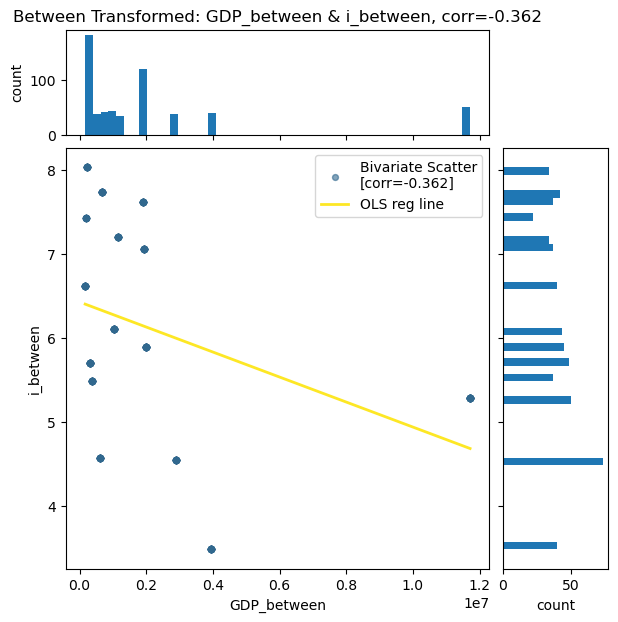

In [69]:
# Bivariate Cloud of Points Plotting for Between - Transformed Variables 
# Target Variables: GDP (Real Gross Domestic Product) and i (Short-Term Interest Rate)
# (!!!) We have a state space vector as we are working with VAR and not two single defined main dependent and explanatory variables

# //////
# Set-up
# //////

# Defining target variables (between)
df = trans_df.copy().dropna()
x = "GDP_between"
y = "i_between"
X = df[x]
Y = df[y]
# Simple correlation coefficient computation
corr = np.corrcoef(X, Y)[0, 1]

# Regression line (OLS) 
slope, intercept = np.polyfit(X, Y, 1)
xx = np.linspace(X.min(), X.max(), 200)
yy = slope * xx + intercept

# ////////
# Plotting
# ////////
# Cloud of Points + reg line + marginals of distribution (top/right)
fig = plt.figure(figsize=(7, 7))
gs = fig.add_gridspec(2, 2, height_ratios=(1, 4), width_ratios=(4, 1),
                      hspace=0.05, wspace=0.05)
# (!!!) New grid to build the top and right-sided distribution graphs
ax_top  = fig.add_subplot(gs[0, 0])
ax_main = fig.add_subplot(gs[1, 0], sharex=ax_top)
ax_right= fig.add_subplot(gs[1, 1], sharey=ax_main)

# Cloud of Points (scatter) + regression line
ax_main.scatter(X, Y, s=18, alpha=0.6, color="#31688E", label=f"Bivariate Scatter\n[corr={corr:.3f}]")
ax_main.plot(xx, yy, linewidth=2, label="OLS reg line", color="#FDE725")
ax_main.set_xlabel(f"{x}")
ax_main.set_ylabel(f"{y}")
ax_main.legend()

# Top marginal (X)
ax_top.hist(X, bins=50)
ax_top.tick_params(axis="x", labelbottom=False)
ax_top.set_ylabel("count")
ax_top.set_title(f"Between Transformed: {x} & {y}, corr={corr:.3f}")

# Right marginal (Y)
ax_right.hist(Y, bins=50, orientation="horizontal")
ax_right.tick_params(axis="y", labelleft=False)
ax_right.set_xlabel("count")

plt.show()

In [68]:
# Bivariate Cloud of Points Plotting for Within - Transformed Variables 
# Target Variables: GDP (Real Gross Domestic Product) and i (Short-Term Interest Rate)
# (!!!) We have a state space vector as we are working with VAR and not two single defined main dependent and explanatory variables

# //////
# Set-up
# //////

# Defining target variables (within)
df = trans_df.copy().dropna()
x = "GDP_within"
y = "i_within"
X = df[x]
Y = df[y]
# Simple correlation coefficient computation
corr = np.corrcoef(X, Y)[0, 1]

# Regression line (OLS) 
slope, intercept = np.polyfit(X, Y, 1)
xx = np.linspace(X.min(), X.max(), 200)
yy = slope * xx + intercept

# ////////
# Plotting
# ////////
# Cloud of Points + reg line + marginals of distribution (top/right)
fig = plt.figure(figsize=(7, 7))
gs = fig.add_gridspec(2, 2, height_ratios=(1, 4), width_ratios=(4, 1),
                      hspace=0.05, wspace=0.05)
# (!!!) New grid to build the top and right-sided distribution graphs
ax_top  = fig.add_subplot(gs[0, 0])
ax_main = fig.add_subplot(gs[1, 0], sharex=ax_top)
ax_right= fig.add_subplot(gs[1, 1], sharey=ax_main)

# Cloud of Points (scatter) + regression line
ax_main.scatter(X, Y, s=18, alpha=0.6, color="#31688E", label=f"Bivariate Scatter\n[corr={corr:.3f}]")
ax_main.plot(xx, yy, linewidth=2, label="OLS reg line", color="#FDE725")
ax_main.set_xlabel(f"{x}")
ax_main.set_ylabel(f"{y}")
ax_main.legend()

# Top marginal (X)
ax_top.hist(X, bins=50)
ax_top.tick_params(axis="x", labelbottom=False)
ax_top.set_ylabel("count")
ax_top.set_title(f"Within Transformed: {x} & {y}, corr={corr:.3f}")

# Right marginal (Y)
ax_right.hist(Y, bins=50, orientation="horizontal")
ax_right.tick_params(axis="y", labelleft=False)
ax_right.set_xlabel("count")

plt.show()

##### <span style="color: dodgerblue"> **1.9) Restricted sample with a BALANCED PANEL: Two way fixed effects (TWFE) formula. Restrict the sample to the countries/individuals available with the longest duration (N=… countries over T=… periods). Compute -x(.t)+x(..), report the 6 numbers in a table as a function of time and plot them as a function of time, then comment. Then compute two-way-fixed-effects x(it)-x(i.)-x(.t)+x(..) transformed variables.** </span>

##### <span style="color: dodgerblue"> **1.10) TWFE Balanced panel. Compute descriptive statistics. Plot boxplots by country ordered by their variance from the smallest to the largest.** </span>

##### <span style="color: dodgerblue"> **1.11) TWFE Balanced panel. Present a table ordering the simple correlation coefficients of TWFE transformed GDPG and EDA/GDP by country from the largest positive to the lowest negative, with the standard error of GDPG and EDA in another column and the coefficient of simple regression: correlation coefficient * standard error of GDPG / standard error of EDA/GDP. Comment.** </span>

##### <span style="color: dodgerblue"> **1.12) UNBALANCED PANEL and TWFE transformation (remove countries with a single observation). Regress within transformed GDPG on time dummies and collect the residuals: this is the TWFE transformation. Regress within transformed EDA/GDP on time dummies and collect the residuals: this is the TWFE transformation. Alternatively, code the Wansbeek Kapstein (1989) transformation for two way fixed effects resulting in their equation 2.13 which is an extension of x(it)-x(i.)-x(.t)+x(..) obtained in the balanced panel case.** </span>

##### <span style="color: dodgerblue"> **1.13) TWFE unbalanced panel: plot the distribution (Kernel DE, histogram, corresponding normal law with the same two first moments). for dependent GDPG and explanatory EDA/GDP. Compare with one-way-fixed effects, between distributions.** </span>

##### <span style="color: dodgerblue"> **1.14) Plot boxplots of between distribution (all countries), then one-way and two-way-fixed effects and first differences distribution BY countries (or 20 individuals if your data set has more than 20 individuals), for the dependent variable and the key explanatory variables. Comment that you find the same insights from question 5. Comment on their differences of standard errors and means for each individuals** </span>

##### <span style="color: dodgerblue"> **1.15) Compute univariate descriptive statistics (min, Q1, median, Q3, max, mean, standard error) for one-way-Within, Between, two-way-fixed-effects and first differences transformed variables. Is the mean different from the median and why? How many standard errors from the mean are the MIN and MAX extremes. Report in the tables standardized MAX and MIN: (MAX-average)/standard error and (MIN-average)/standard error instead of MAX and MIN?** </span>

##### <span style="color: dodgerblue"> **1.16) Compare and comment the between versus one-way-within transformed bivariate correlation matrix for all variables (include a time trend 1,2,.,T) and with their lag (for time varying variables). Check poor simple correlation with the dependent variables and high correlation between explanatory variables.** </span>

##### <span style="color: dodgerblue"> **1.17) Comment the bivariate auto-correlation and trend-correlations (check the number of observations).** </span>

##### <span style="color: dodgerblue"> **1.18) In what follows, you do not need to include a deterministic time trend 1,2,.,T because the two transformations used eliminate it. Compare and comment of the two-way-within transformed bivariate simple correlation matrix of all the variables and another bivariate simple correlation matrix with all the first differences transformed variables (in the case of first differences, include also the lag of all variables). Check poor simple correlation below 0.1 with the dependent variables and high correlation between explanatory variables (over 0.8). Show the first 30 observations for the first differences and the lag of first differences. Check that each time you change individual, you have a dot for missing observation.** </span>

##### <span style="color: dodgerblue"> **1.19) Comment the bivariate graphs with linear, quadratic and Lowess fit for dependent and key explanatory variable (growth of gdp/head on vertical axis and aid/gdp): Within transformed, Between transformed, First differences, two-way-within transformed.** </span>

### **2) PART 2 - CLASSIC BENCHMARK MULTIVARIATE PANEL DATA ESTIMATORS**

##### <span style="color: orange"> **2.20) In a single table, report and comment the results of estimations of Between, Within (one-way fixed effects, (fe)) and Mundlak (random effects (re) including all X(i.) as regressors), two-way fixed effects (add year dummies in fe regression) and First differences, including all explanatory variables except the ones with high near-multicollinearity after their transformation.** </span>

##### <span style="color: orange"> **2.21) If, for the first differences dependent variable, it remains a simple auto-correlation above 0.1, a dynamic panel estimator can be tried. The estimators of the generalized method of moments (GMM) for panel data are only valid for short time panel T<10 and they face the issue of too many weak instruments. We suggest using its precursor, the Anderson-Hsiao (1981) estimator which allows to check the first stage of instrumental variables and to test for weak lagged instruments. Estimate an auto-regressive distributed lag (ARDL) model for dynamic panel data including the first lag of the dependent variable (for example: GDP per head growth) and the first lag of the key explanatory variable (for example: foreign aid/GDP), adding the first lag of other control variables is optional: Δ GDPGi,t = βy Δ GDPGi,t-1 + β1 Δ (aid/GDP)i,t + β2 Δ (aid/GDP)i,t-1 + Δ Controls i,t + Δ αi + Δ αt + Δ εi** </span>

!!! it has a lot of parts (check the paper)

### **2) PART 2B - OPTIONAL (if one of your variable is time-invariant z(i))**

##### <span style="color: orange"> **2.22) If one of your variable is time-invariant z(i), run a baseline Hausman Taylor estimation (pre-coded only in STATA) including all X(i.) as instruments. Comment the results. Else skip this question.** </span>

##### <span style="color: orange"> **2.23) If one of your variable is time-invariant z(i), run a between regression on z(i) explained by X(i.) and other time invariant variable (only with N observations). If the R2 is low, this may signal X(i.) are weak instruments poorly correlated with the variable z(i) to be instrumented. Comment. Else skip this question.** </span>

##### <span style="color: orange"> **2.24) If one of your variable is time-invariant z(i), as seen above, time invariant explanatory variables cannot explain the time varying within variance of the dependent variable and the Hausman Taylor internal instruments estimator is not so practical. Therefore, a practical shortcut is to include a time invariant variable multiplied by a time varying variable (interaction term): z(i) multiplied for x(it). Generate such a variable Include this product AND foreign aid into a one way fixed effects regression. Plot the estimated marginal effect (derivative) with respect to ICRG as a function of EDA/GDP (which is positive and goes as far as 20%).** </span>

### **3) PART 3 - OPEN SECTION**

##### <span style="color: red"> **3.25) Do whatever seem interesting to you in terms of original estimations (not already done by the replication of the original authors) with this database, present the table(s) in this file with comments, not only in the html output with code and output.** </span>